In [1]:
from __future__ import print_function
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)
import numpy as np
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster",font_scale=1.2,rc={"font":"helvetica"}); 
sns.set_style("white")
sns.set_style("ticks")
cp = sns.color_palette("colorblind") #sns.palplot(current_palette)
from importlib import reload

import matplotlib
matplotlib.rc_file(matplotlib.matplotlib_fname())
%matplotlib inline
%config InlineBackend.figure_format = "retina"
#%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
#%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.weight'] = "normal"
rcParams["axes.formatter.useoffset"] = False
rcParams['xtick.major.width']=1
rcParams['xtick.major.size']=7
rcParams['xtick.minor.width']=1
rcParams['xtick.minor.size']=4
rcParams['ytick.major.width']=1
rcParams['ytick.major.size']=7
rcParams['ytick.minor.width']=1
rcParams['ytick.minor.size']=4
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'
rcParams['axes.formatter.limits'] = -10,10
import astropy.constants as aconst
import astropylib.exoplanet_functions
import astropylib.gkastro
import astropylib.nexopl
import astropylib.spec_help


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


Reading rvprec
Finished


In [2]:
from exotk.priors import PriorSet, UP, NP, JP, FP
import sys
sys.path.append('../src/')
import rm
rm

<module 'rm' from '../src/rm.py'>

In [41]:
T0 = 2459097.80064
tdur = 1./24.

f = '/Users/gks/Dropbox/mypylib/notebooks/FLASK/01_microblog/app/static/DATA/HPF_RVS2/uploading/data/targets/TRAPPIST-1/results_20200909_o45614151617/TRAPPIST-1_rv_unbin.csv'
df = pd.read_csv(f)
df = df[df.e_rv < 35.]
#m = (df.bjd.values > T0 - 2.*tdur) & (df.bjd.values < T0 + 2.*tdur)
#df = df[m]
df

,bjd,rv,e_rv,pre_rv,pre_e_rv,sn18,exptime,berv,qprog,airmass,filename,dLW,e_dLW,crx,e_crx,ln_order_center,irt_ind1,irt_ind1_e,irt_ind2,irt_ind2_e,irt_ind3,irt_ind3_e
0,2.458394e+06,-18.136456,21.613558,14.192392,9.278006,28.819138,308.85,-12.035209,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,819.468737,54.582009,-807.086425,351.696739,[,0.880220,0.073763,0.553018,0.060598,0.812967,0.053879
1,2.458394e+06,21.088780,15.703811,-63.697461,8.429792,34.990181,308.85,-12.047106,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,288.037615,41.484937,668.296521,369.662220,9,0.978529,0.066155,0.432834,0.070421,0.601564,0.043416
2,2.458394e+06,28.713014,13.547676,-63.055081,6.987678,39.227505,308.85,-12.059193,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,178.374740,36.035615,-0.543677,245.600692,.,0.915685,0.054080,0.679979,0.062057,0.695121,0.040950
3,2.458394e+06,19.023779,13.237920,-56.424435,7.541635,39.771271,298.20,-12.071150,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,86.780972,35.491931,-167.488960,168.710544,0,1.105418,0.059066,0.355839,0.054828,0.603650,0.036030
4,2.458394e+06,-22.435922,12.979623,-0.334793,7.337420,39.594711,308.85,-12.083071,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,-50.390134,35.153955,31.559688,406.880344,0,0.949297,0.059792,0.609319,0.049997,0.598758,0.038322
5,2.458394e+06,-15.636000,14.339095,-13.245021,7.443945,36.566582,298.20,-12.094939,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,38.208211,38.687752,103.263000,248.033210,3,0.955509,0.056403,0.573108,0.058665,0.649799,0.041496
6,2.458394e+06,25.498633,15.682685,-86.071797,8.545644,34.605629,308.85,-12.106961,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,-14.981102,42.330164,-99.243199,426.663620,8,0.925259,0.070020,0.578292,0.068579,0.448756,0.054922
7,2.458394e+06,14.657846,18.508608,-84.255378,8.420814,29.837332,298.20,-12.118837,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,43.465649,50.158469,-649.802100,257.044589,3,0.886981,0.114561,0.723775,0.078778,0.647621,0.057021
8,2.458394e+06,18.347825,22.163480,-32.929528,8.543944,26.174534,308.85,-12.130707,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,125.338988,59.946547,172.356708,538.609766,3,1.132685,0.143190,0.616187,0.085442,0.841210,0.094908
10,2.458395e+06,-0.588674,8.823772,-4.522537,5.567736,62.029854,1214.10,-12.507830,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,567.579005,22.198038,-160.906695,185.738662,5,0.946452,0.022081,0.618070,0.017066,0.725870,0.017181


In [44]:
np.diff(df.bjd.values)*24*60.

array([5.75029470e+00, 5.83472461e+00, 5.76811530e+00, 5.74969858e+00,
       5.72638214e+00, 5.80634549e+00, 5.74353218e+00, 5.75251892e+00,
       1.39146169e+03, 1.98165404e+01, 2.84393179e+03, 5.81408836e+00,
       5.73170498e+00, 5.74537754e+00, 5.82830675e+00, 5.80750689e+00,
       4.28927445e+03, 1.16792896e+01, 5.73851895e+03, 6.17916182e+00,
       7.65261255e+00, 7.67952181e+00, 6.75031073e+00, 3.29908208e+04,
       5.74635185e+00, 5.63301243e+00, 5.61129726e+00, 5.72706543e+00,
       5.57518199e+00, 3.77663996e+05, 5.65810516e+00, 5.68498895e+00,
       2.84999291e+03, 5.55378333e+00, 5.61582148e+00, 5.72598718e+00,
       5.67949243e+00, 5.63103765e+00, 5.45545684e+04, 4.30618754e+03,
       5.55214852e+00, 5.59611127e+00, 1.16916157e+01, 1.72125745e+04,
       5.66129833e+00, 5.61078228e+00, 1.42906216e+03, 5.66355608e+00,
       5.63315459e+00, 5.67019723e+00, 5.61131872e+00, 5.75511798e+00,
       4.45152850e+05, 1.62955885e+01, 2.72605311e+04, 1.69125154e+01,
      

In [52]:
N = np.round((df.bjd.values[0]-Tc)/P)
T0_0 = Tc + N*P
T0_0

2458393.730868116

In [46]:
P, Perr = 1.5108795116,0.0000006683
Tc, Tcerr = 2457322.5172943915,0.0000927704

In [53]:
T0 = 2459097.80064
tdur = 1./24.

f = '/Users/gks/Dropbox/mypylib/notebooks/FLASK/01_microblog/app/static/DATA/HPF_RVS2/uploading/data/targets/TRAPPIST-1/results_20200909_o45614151617/TRAPPIST-1_rv_unbin.csv'
df = pd.read_csv(f)
df = df[df.e_rv < 35.]
m = (df.bjd.values > T0_0 - 2.*tdur) & (df.bjd.values < T0_0 + 2.*tdur)
df = df[m]
df

,bjd,rv,e_rv,pre_rv,pre_e_rv,sn18,exptime,berv,qprog,airmass,filename,dLW,e_dLW,crx,e_crx,ln_order_center,irt_ind1,irt_ind1_e,irt_ind2,irt_ind2_e,irt_ind3,irt_ind3_e
0,2.458394e+06,-18.136456,21.613558,14.192392,9.278006,28.819138,308.85,-12.035209,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,819.468737,54.582009,-807.086425,351.696739,[,0.880220,0.073763,0.553018,0.060598,0.812967,0.053879
1,2.458394e+06,21.088780,15.703811,-63.697461,8.429792,34.990181,308.85,-12.047106,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,288.037615,41.484937,668.296521,369.662220,9,0.978529,0.066155,0.432834,0.070421,0.601564,0.043416
2,2.458394e+06,28.713014,13.547676,-63.055081,6.987678,39.227505,308.85,-12.059193,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,178.374740,36.035615,-0.543677,245.600692,.,0.915685,0.054080,0.679979,0.062057,0.695121,0.040950
3,2.458394e+06,19.023779,13.237920,-56.424435,7.541635,39.771271,298.20,-12.071150,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,86.780972,35.491931,-167.488960,168.710544,0,1.105418,0.059066,0.355839,0.054828,0.603650,0.036030
4,2.458394e+06,-22.435922,12.979623,-0.334793,7.337420,39.594711,308.85,-12.083071,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,-50.390134,35.153955,31.559688,406.880344,0,0.949297,0.059792,0.609319,0.049997,0.598758,0.038322
5,2.458394e+06,-15.636000,14.339095,-13.245021,7.443945,36.566582,298.20,-12.094939,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,38.208211,38.687752,103.263000,248.033210,3,0.955509,0.056403,0.573108,0.058665,0.649799,0.041496
6,2.458394e+06,25.498633,15.682685,-86.071797,8.545644,34.605629,308.85,-12.106961,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,-14.981102,42.330164,-99.243199,426.663620,8,0.925259,0.070020,0.578292,0.068579,0.448756,0.054922
7,2.458394e+06,14.657846,18.508608,-84.255378,8.420814,29.837332,298.20,-12.118837,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,43.465649,50.158469,-649.802100,257.044589,3,0.886981,0.114561,0.723775,0.078778,0.647621,0.057021
8,2.458394e+06,18.347825,22.163480,-32.929528,8.543944,26.174534,308.85,-12.130707,PSU18-3-008,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,125.338988,59.946547,172.356708,538.609766,3,1.132685,0.143190,0.616187,0.085442,0.841210,0.094908


No handles with labels found to put in legend.


15.682684516954927


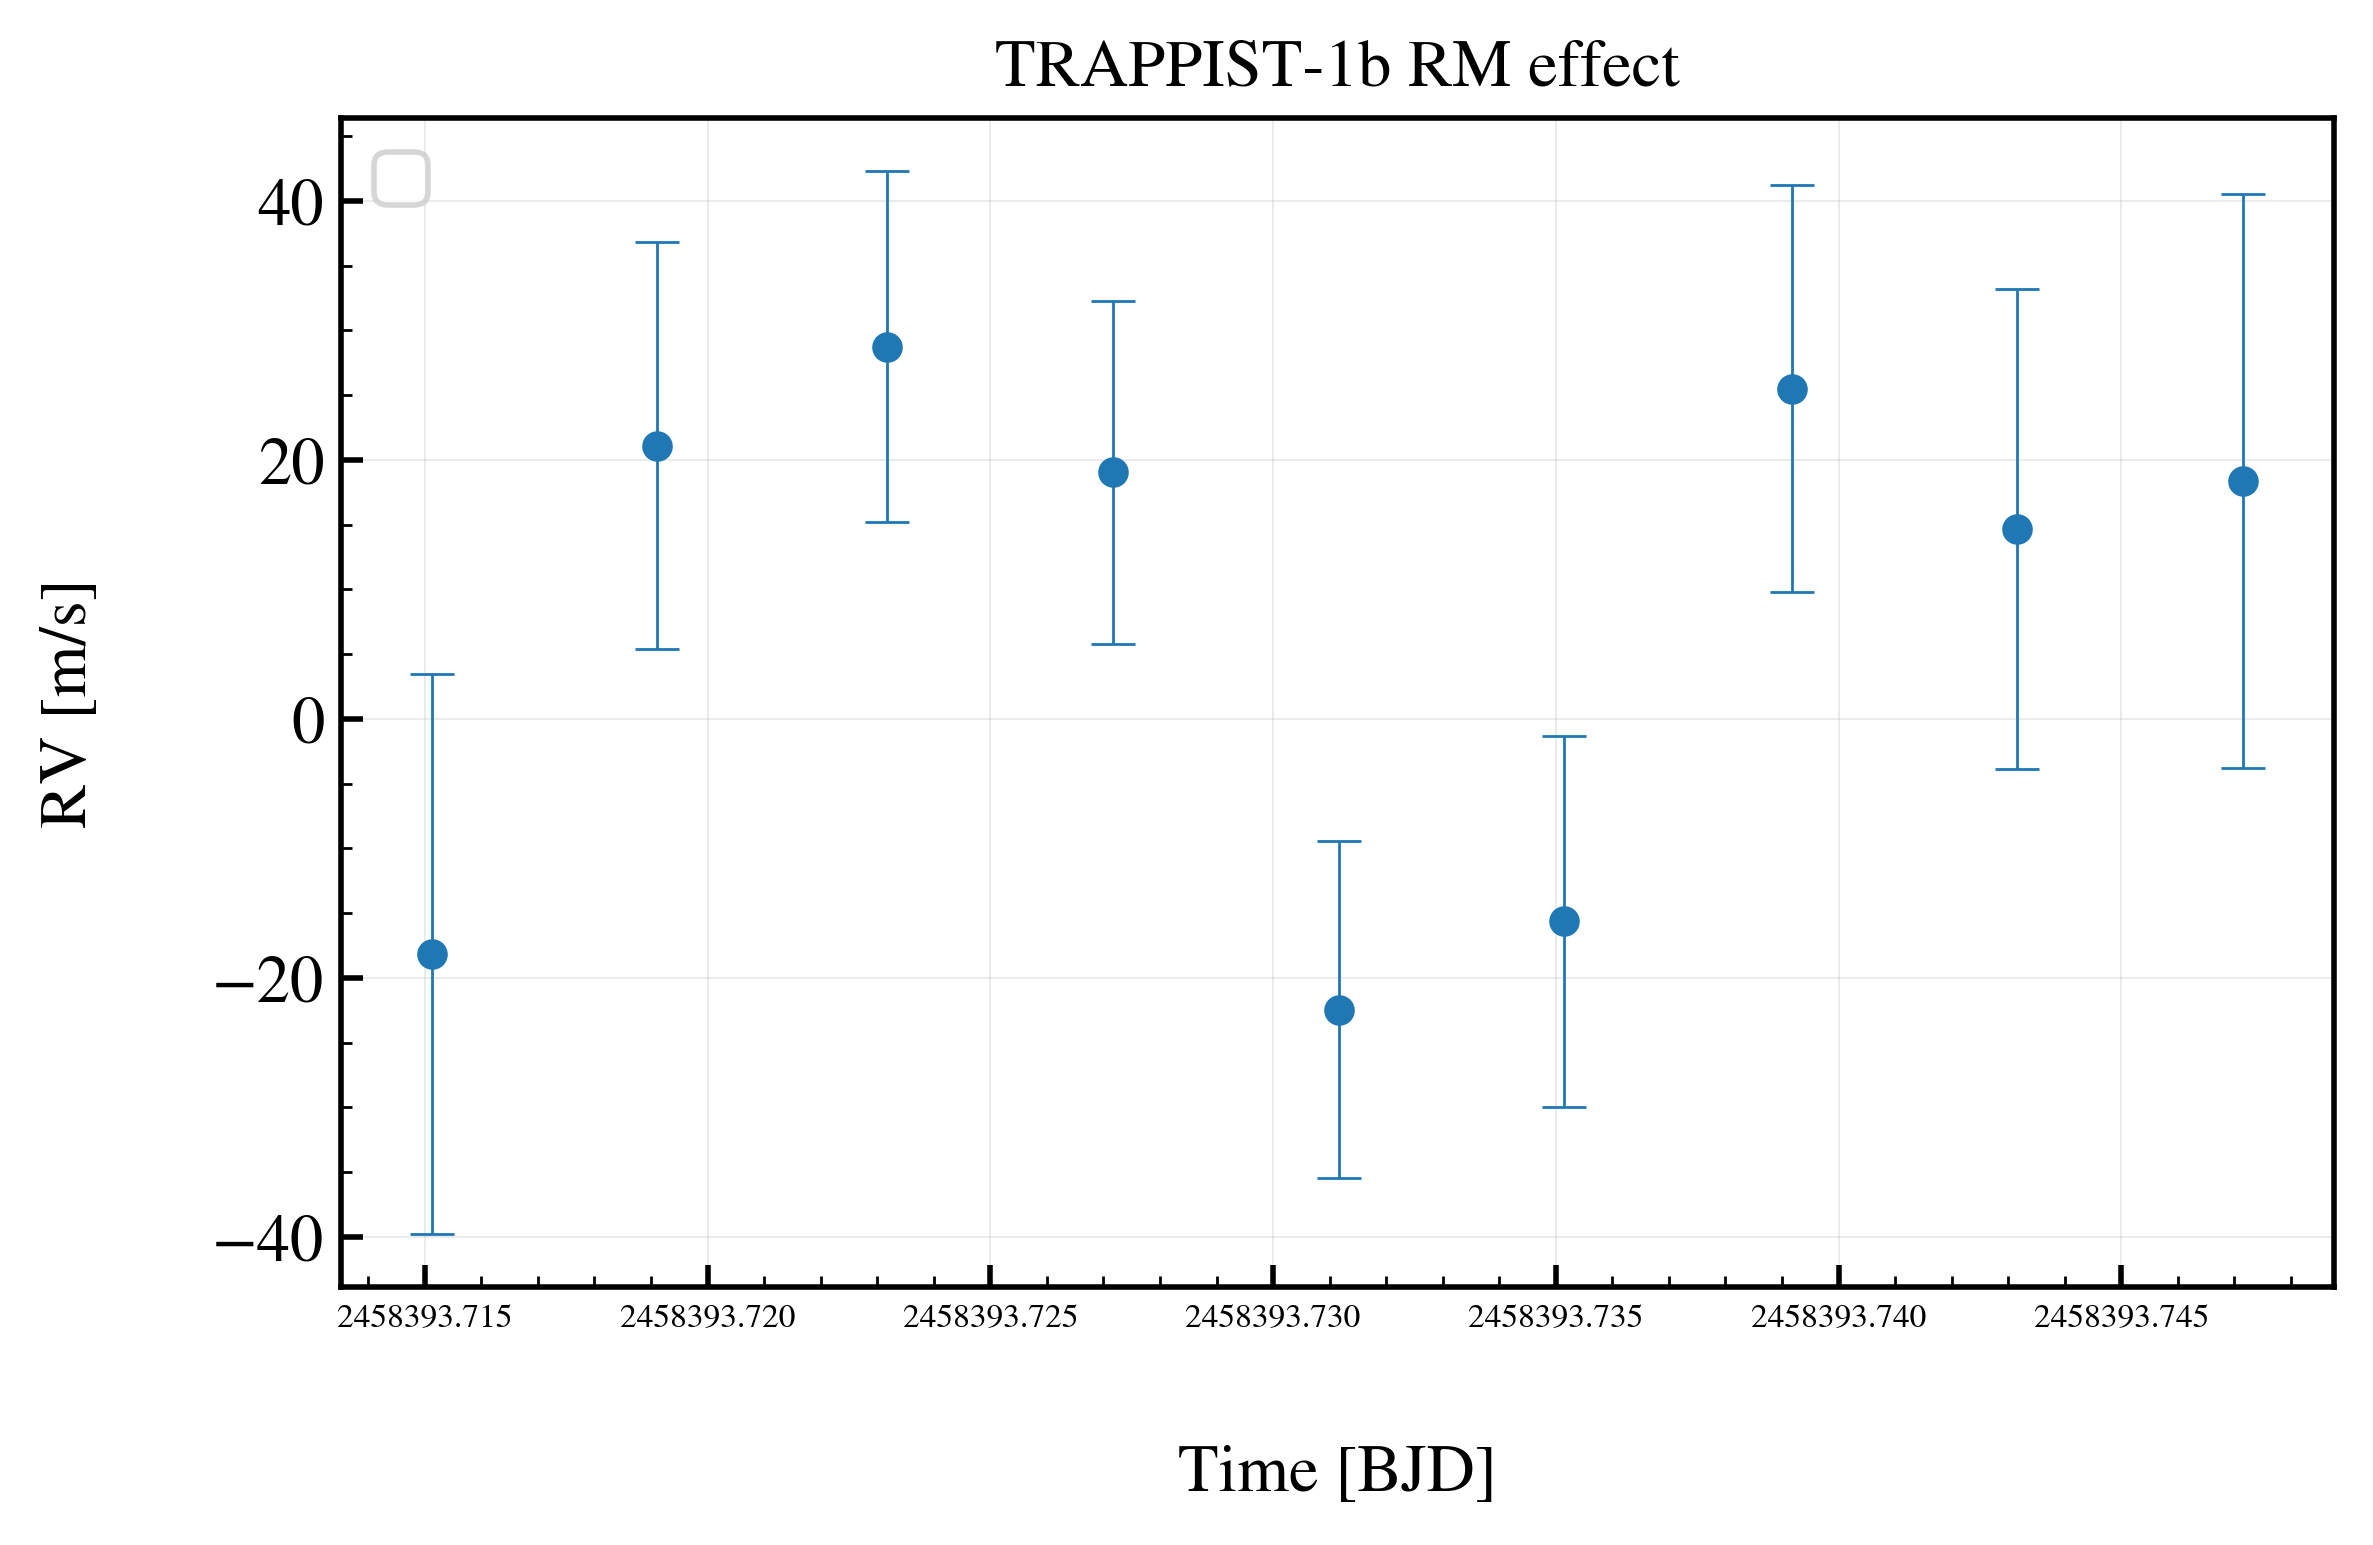

In [54]:
fig, ax = plt.subplots(dpi=200)
#ax.plot(x,rm_hirano,color='crimson')
ax.errorbar(df.bjd,df.rv,df.e_rv,marker='o',lw=0,mew=0.5,elinewidth=0.5,capsize=4)

ax.legend(loc="upper left",fontsize=12)
astropylib.gkastro.ax_apply_settings(ax)
ax.set_xlabel('Time [BJD]',fontsize=12)
ax.set_ylabel('RV [m/s]',fontsize=12)
ax.set_title('TRAPPIST-1b RM effect',fontsize=12)

fig.tight_layout()
astropylib.gkastro.ax_set_linewidth(ax,1)
ax.tick_params('x',labelsize=6)
print(np.median(df.e_rv))

In [55]:
f = '../data/20200909_trappist1.dat'
L = rm.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rm.RMFit(L)

   prior          arg1          arg2     label description priortype  fixed
0     NP  2.457323e+06  9.277040e-05     t0_p1       t0_p1     model  False
1     NP  1.510880e+00  6.683000e-07      P_p1        P_p1     model  False
2     UP -1.800000e+02  1.800000e+02    lam_p1      lam_p1     model  False
3     NP  2.000000e+00  5.000000e-01     vsini       vsini     model  False
4     NP  8.900000e+01  2.000000e-01    inc_p1      inc_p1     model  False
5     NP  8.360000e-02  2.000000e-03      p_p1        p_p1     model  False
6     NP  2.000000e+01  5.000000e-01      a_p1        a_p1     model  False
7     NP  8.900000e-02  1.000000e-03     rstar       rstar     model  False
8     NP  5.000000e-01  5.000000e-02        u1          u1     model  False
9     UP -5.000000e+01  5.000000e+01     gamma       gamma     model  False
10    FP  0.000000e+00  0.000000e+00    ecc_p1      ecc_p1     model   True
11    FP  9.000000e+01  9.000000e+01  omega_p1    omega_p1     model   True
12    NP  3.

In [56]:
TF.minimize_PyDE(mcmc=False)

Running PyDE Optimizer
Optimized using PyDE
Final parameters:
    labels       centers         lower         upper            pv   center_dist
0    t0_p1  2.457323e+06  2.457323e+06  2.457323e+06  2.457323e+06  2.851244e-06
1     P_p1  1.510880e+00  1.510876e+00  1.510883e+00  1.510879e+00  1.076484e-07
2   lam_p1  0.000000e+00 -1.800000e+02  1.800000e+02  2.985026e+01 -2.985026e+01
3    vsini  2.000000e+00 -5.000000e-01  4.500000e+00  2.088934e+00 -8.893381e-02
4   inc_p1  8.900000e+01  8.800000e+01  9.000000e+01  8.899166e+01  8.340358e-03
5     p_p1  8.360000e-02  7.360000e-02  9.360000e-02  8.365359e-02 -5.359295e-05
6     a_p1  2.000000e+01  1.750000e+01  2.250000e+01  2.001603e+01 -1.603478e-02
7    rstar  8.900000e-02  8.400000e-02  9.400000e-02  8.899953e-02  4.664136e-07
8       u1  5.000000e-01  2.500000e-01  7.500000e-01  5.014246e-01 -1.424576e-03
9    gamma  0.000000e+00 -5.000000e+01  5.000000e+01  9.608650e+00 -9.608650e+00
10   vbeta  3.000000e+00  5.000000e-01  5.50000

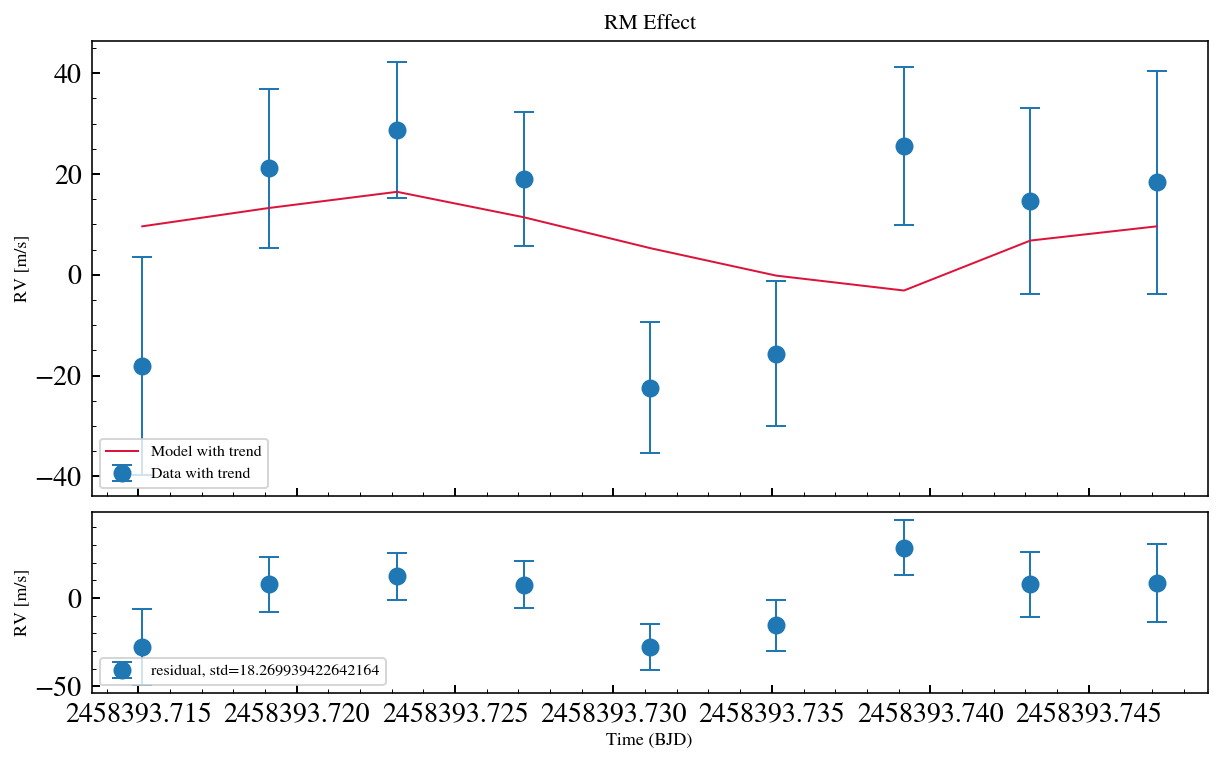

In [57]:
TF.plot_lc(TF.min_pv)

In [58]:
TF.minimize_PyDE(mcmc=True,mc_iter=1000)

Running PyDE Optimizer
Optimized using PyDE
Final parameters:
    labels       centers         lower         upper            pv   center_dist
0    t0_p1  2.457323e+06  2.457323e+06  2.457323e+06  2.457323e+06  2.809800e-06
1     P_p1  1.510880e+00  1.510876e+00  1.510883e+00  1.510879e+00  1.080041e-07
2   lam_p1  0.000000e+00 -1.800000e+02  1.800000e+02  2.986052e+01 -2.986052e+01
3    vsini  2.000000e+00 -5.000000e-01  4.500000e+00  2.089044e+00 -8.904355e-02
4   inc_p1  8.900000e+01  8.800000e+01  9.000000e+01  8.899166e+01  8.340084e-03
5     p_p1  8.360000e-02  7.360000e-02  9.360000e-02  8.365477e-02 -5.476664e-05
6     a_p1  2.000000e+01  1.750000e+01  2.250000e+01  2.001580e+01 -1.579850e-02
7    rstar  8.900000e-02  8.400000e-02  9.400000e-02  8.899969e-02  3.138876e-07
8       u1  5.000000e-01  2.500000e-01  7.500000e-01  5.013881e-01 -1.388066e-03
9    gamma  0.000000e+00 -5.000000e+01  5.000000e+01  9.613144e+00 -9.613144e+00
10   vbeta  3.000000e+00  5.000000e-01  5.50000

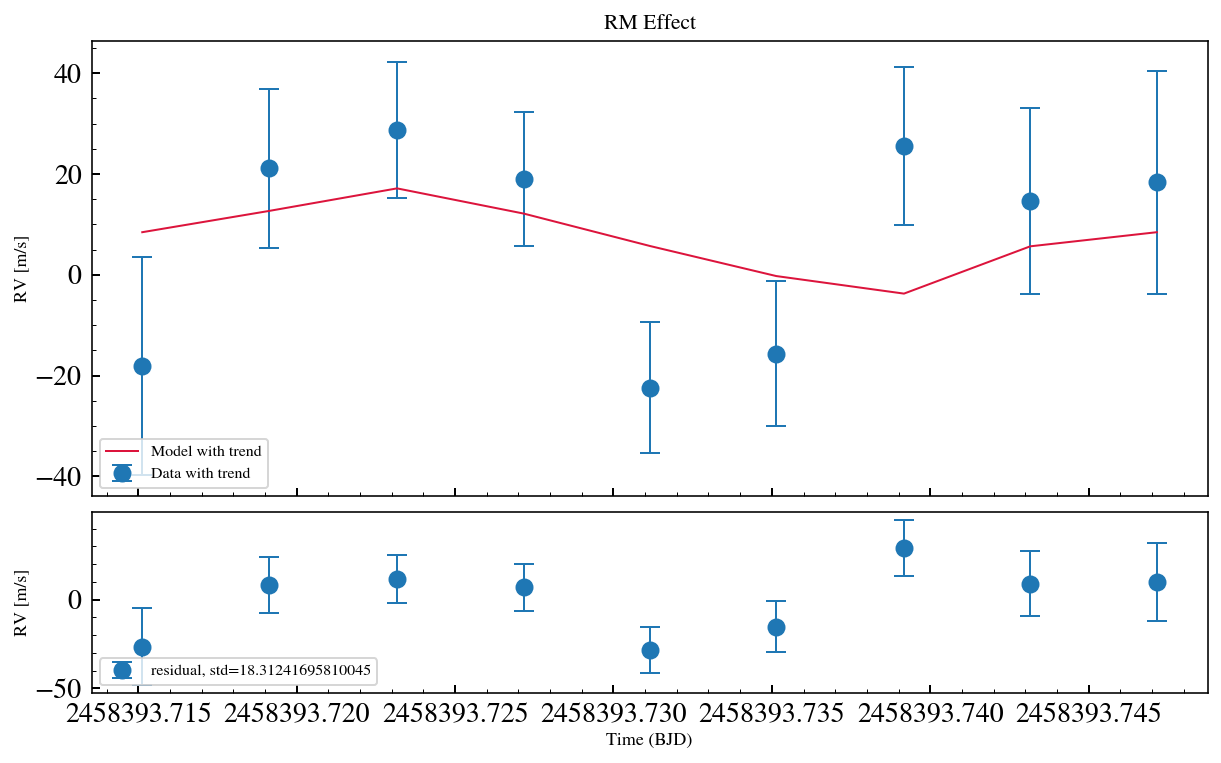

In [59]:
TF.plot_lc_mcmc_fit()

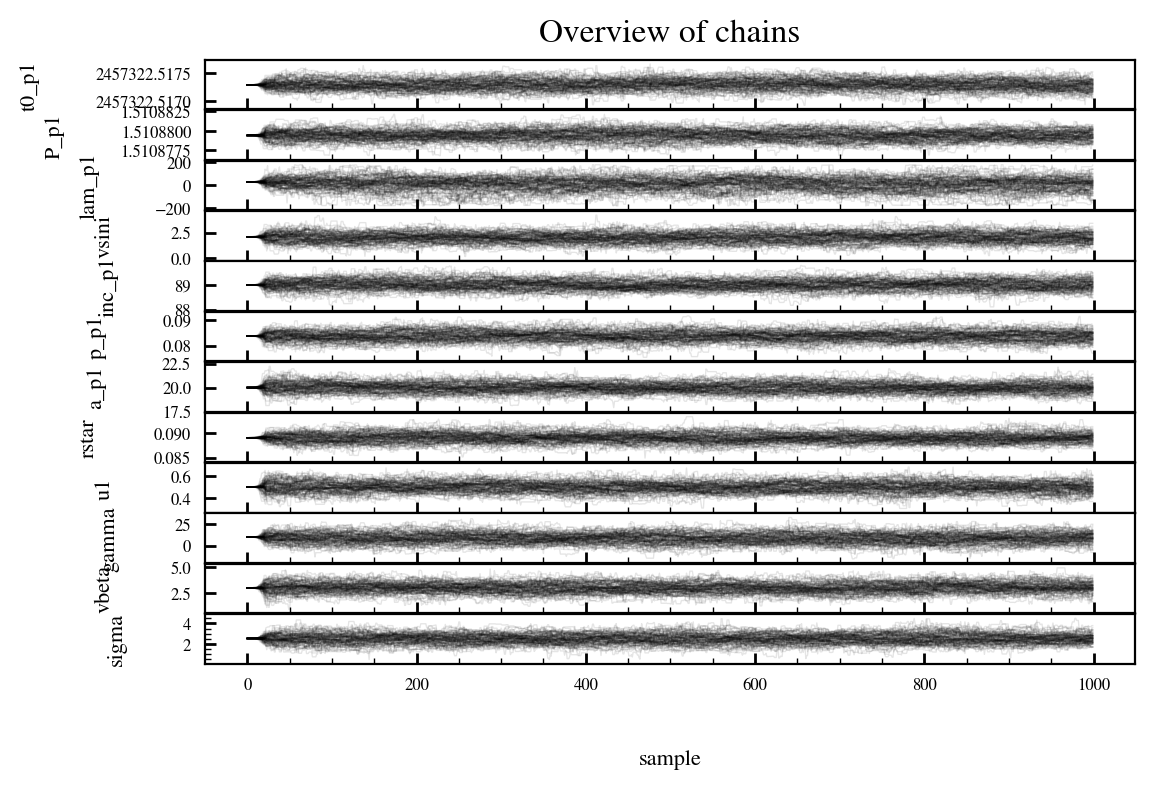

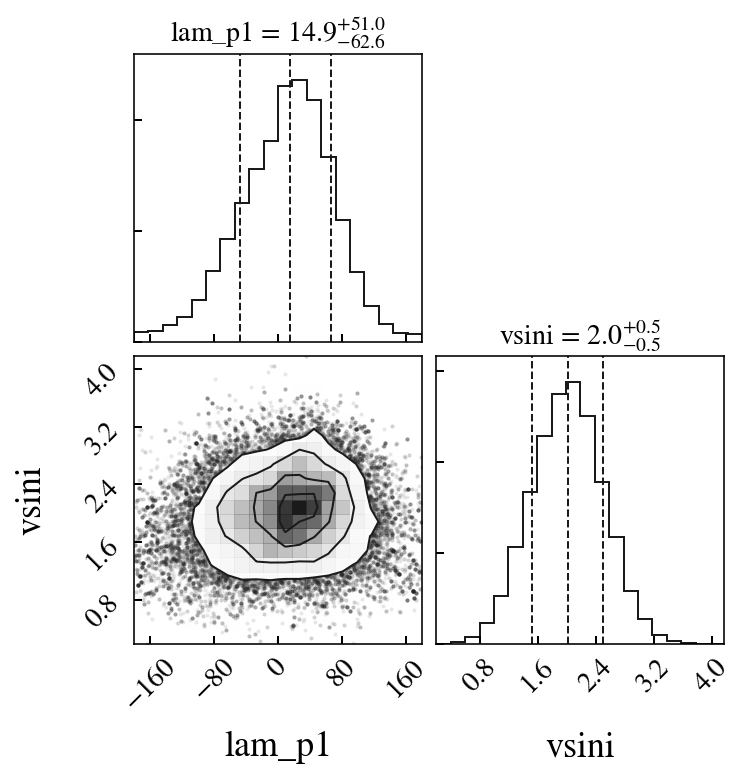

In [60]:
from astropylib import mcFunc
mcFunc.plot_chains(TF.sampler.chain,labels=TF.lpf.ps_vary.labels)
fig = astropylib.mcFunc.plot_corner(TF.sampler.chain[:,100:,[2,3]],
       show_titles=True,labels=np.array(TF.lpf.ps_vary.descriptions)[[2,3]],title_fmt='.1f',xlabcord=(0.5, -0.2))

Sampling, i= 0
Sampling, i= 100
Sampling, i= 200
Sampling, i= 300
Sampling, i= 400
Sampling, i= 500
Sampling, i= 600
Sampling, i= 700


Text(0.5, 0, 'Time from mid transit [hours]')

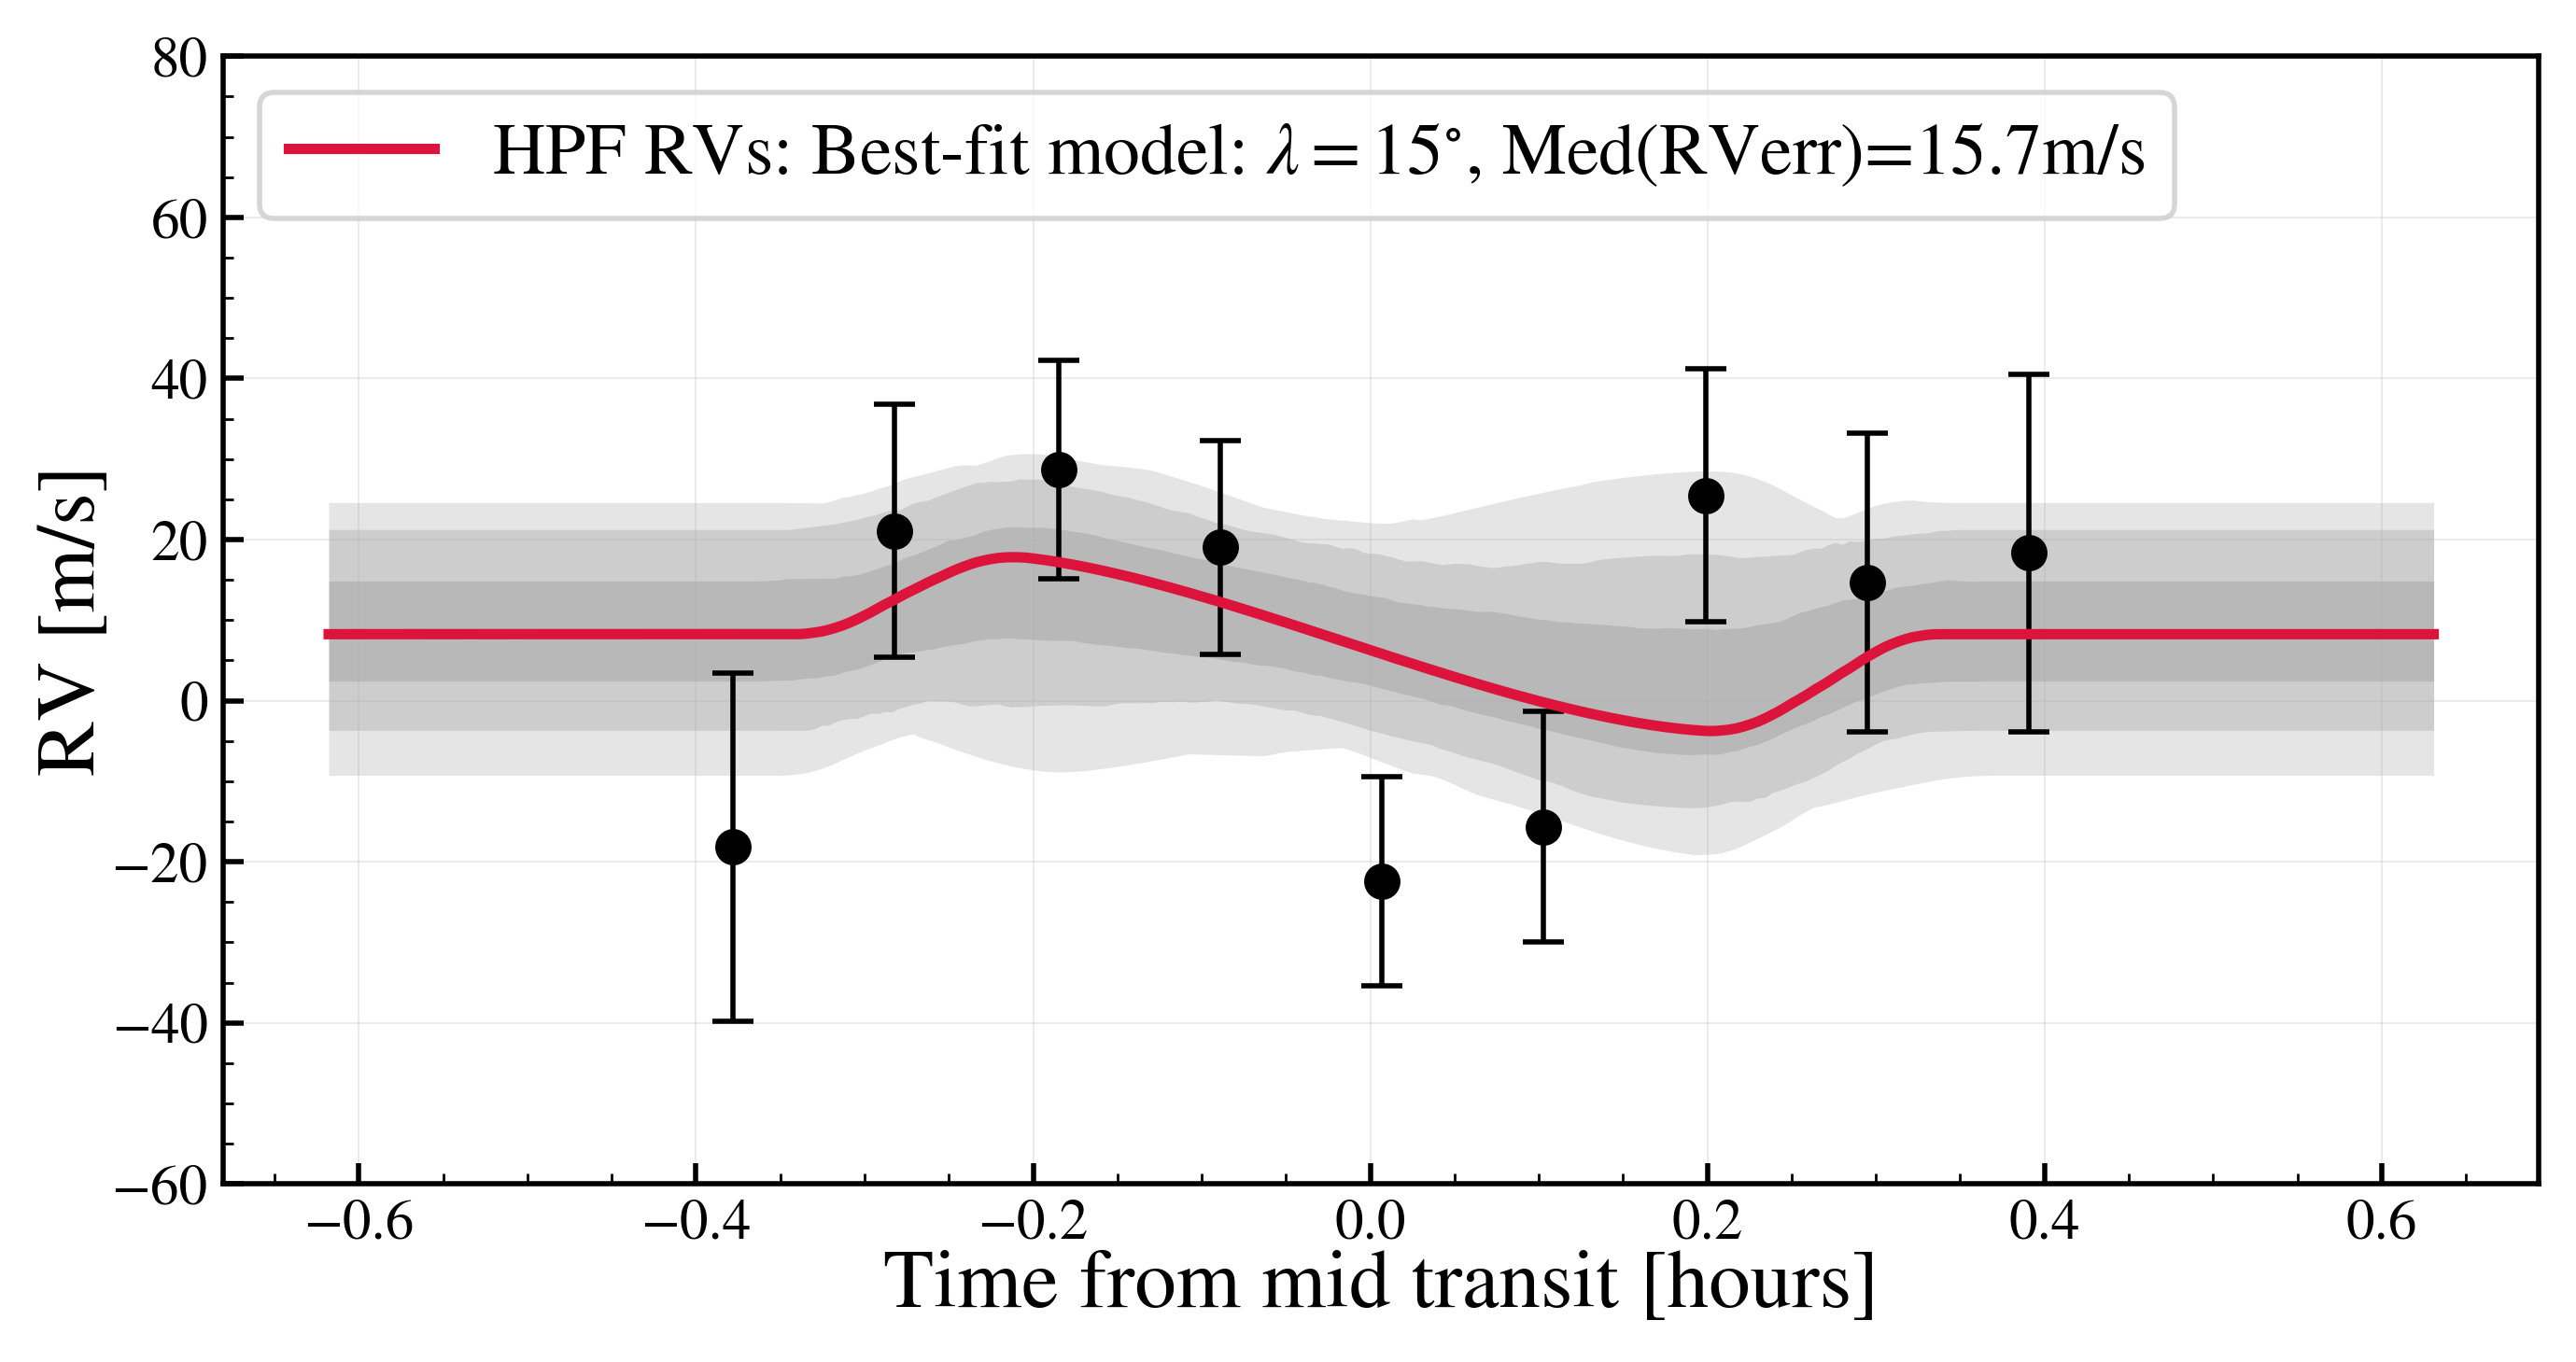

In [78]:
import astropylib.spec_help
#flatchain = TF.sampler.chain[:,2000::100,:].reshape((-1,len(TF.lpf.priors)))
flatchain = TF.sampler.chain[:,100:,:].reshape((-1,len(TF.lpf.ps_vary.priors)))

times = np.linspace(TF.lpf.data['time'][0],TF.lpf.data['time'][-1],500)

pv_50 = np.percentile(flatchain,[50],axis=0)[0]
t1_mod = np.linspace(times.min()-0.01,times.max()+0.01,300)

rv_50 = TF.lpf.compute_transit(pv_50,t1_mod)

# Plot random samples
fig, ax = plt.subplots(dpi=200,figsize=(8,4))#,gridspec_kw={'height_ratios': [2, 2]})


#################
# Transit 1
#################
markercolor="black"
ax.errorbar((TF.lpf.data['time']-T0_0)*24,TF.lpf.data['flux'],TF.lpf.data['error'],
            marker='o',elinewidth=1,capsize=4,lw=0,mew=1,color=markercolor,markersize=6)
lab = r'HPF RVs: Best-fit model: $\lambda=${:0.0f}'.format(pv_50[2])+'$^{\circ}$'
lab += ', Med(RVerr)={:0.1f}m/s'.format(np.median(TF.lpf.data['error']))
ax.plot((t1_mod-T0_0)*24.,rv_50,color="crimson",
        label=lab,lw=2.,zorder=10)
ax.legend(loc='upper left',fontsize=14)

#################
# Sample models
#################
mmodel1 = []
for i in range(800):
    if i%100 == 0: print("Sampling, i=",i)
    idx = np.random.randint(0, flatchain.shape[0])
    m1 = TF.lpf.compute_transit(flatchain[idx],times=t1_mod)
    mmodel1.append(m1)

mmodel1 = np.array(mmodel1)


shadecolor="black"
ax.fill_between((t1_mod-T0_0)*24.,np.quantile(mmodel1,0.16,axis=0),np.quantile(mmodel1,0.84,axis=0),alpha=0.1,color=shadecolor,lw=0,label='1$\sigma$',zorder=-1)
ax.fill_between((t1_mod-T0_0)*24.,np.quantile(mmodel1,0.02,axis=0),np.quantile(mmodel1,0.98,axis=0),alpha=0.1,color=shadecolor,lw=0,label='2$\sigma$',zorder=-1)
ax.fill_between((t1_mod-T0_0)*24.,np.quantile(mmodel1,0.0015,axis=0),np.quantile(mmodel1,0.9985,axis=0),alpha=0.1,color=shadecolor,lw=0,label='3$\sigma$',zorder=-1)


astropylib.gkastro.ax_apply_settings(ax,ticksize=11)
ax.set_ylim(-60,80)
astropylib.gkastro.ax_set_linewidth(ax,1)
    
ax.set_ylabel("RV [m/s]",fontsize=16,labelpad=0)   
ax.set_xlabel('Time from mid transit [hours]',fontsize=16,labelpad=0)

In [79]:
T0 = 2459097.80064
tdur = 1./24.

f = '../data/rvs/TRAPPIST-1_rv_unbin.csv'
df = pd.read_csv(f)
df = df[df.e_rv < 35.]
m = (df.bjd.values > T0 - 2.*tdur) & (df.bjd.values < T0 + 2.*tdur)
df = df[m]
df

,bjd,rv,e_rv,pre_rv,pre_e_rv,sn18,exptime,berv,qprog,airmass,filename,dLW,e_dLW,crx,e_crx,ln_order_center,irt_ind1,irt_ind1_e,irt_ind2,irt_ind2_e,irt_ind3,irt_ind3_e
83,2.459098e+06,8.047460,24.235785,-170.539241,8.509411,24.182875,308.85,1.081182,PSU20-3-011,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,-142.032225,67.430978,-295.941623,384.758960,1,0.628042,0.137434,0.507992,0.110609,0.647894,0.103813
84,2.459098e+06,-17.251909,22.556954,0.825410,10.053263,26.187248,308.85,1.069164,PSU20-3-011,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,-93.165045,62.366600,635.018188,306.856625,8,0.918898,0.120841,0.792426,0.155295,0.489296,0.070308
85,2.459098e+06,-18.965281,19.398450,166.498414,6.294101,29.684572,308.85,1.057424,PSU20-3-011,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,-13.706838,53.391864,-432.164025,420.030874,1,1.091364,0.077115,0.587615,0.119497,0.737022,0.065524
86,2.459098e+06,13.825485,18.231602,-113.451859,9.793096,32.297302,308.85,1.045497,PSU20-3-011,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,-164.320565,50.560425,-109.147662,288.865824,4,0.971274,0.084566,0.374248,0.086880,0.625231,0.054839
87,2.459098e+06,-5.122258,16.851717,-141.912780,9.088352,33.216705,308.85,1.033611,PSU20-3-011,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,-205.042894,46.794278,-242.526940,527.489200,7,1.008272,0.064391,0.608460,0.082545,0.651303,0.064734
88,2.459098e+06,-17.268359,18.753450,-17.460378,9.575348,31.231071,308.85,1.021946,PSU20-3-011,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,-323.826763,52.346550,-254.020047,380.466038,6,1.268223,0.094056,0.428335,0.120916,0.652061,0.065025
89,2.459098e+06,31.685119,20.378324,-280.550451,9.377959,28.389698,308.85,1.009996,PSU20-3-011,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,-30.503284,56.208089,-965.838606,465.650177,,0.627980,0.102481,0.274772,0.085239,0.902218,0.069654
90,2.459098e+06,0.690179,20.662622,-146.835414,9.885538,27.834625,308.85,0.998019,PSU20-3-011,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,-84.644965,57.097206,-848.843599,275.954267,9,0.875428,0.099986,0.683629,0.106166,0.539643,0.061440
91,2.459098e+06,-18.895262,23.580689,5.787677,6.705743,25.777046,308.85,0.986215,PSU20-3-011,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,-106.312720,65.328701,-695.121044,537.444355,.,1.070978,0.164489,0.782475,0.116852,0.822621,0.080455
92,2.459098e+06,40.593798,28.498225,-155.670104,9.163533,21.812386,308.85,0.974328,PSU20-3-011,NaN,/gpfs/group/cfb12/default/HPFData/Processed/Wa...,-155.306210,79.201043,-840.903944,876.488444,1,0.794826,0.143111,0.032053,0.197259,0.974952,0.133114


No handles with labels found to put in legend.


20.662622215231952


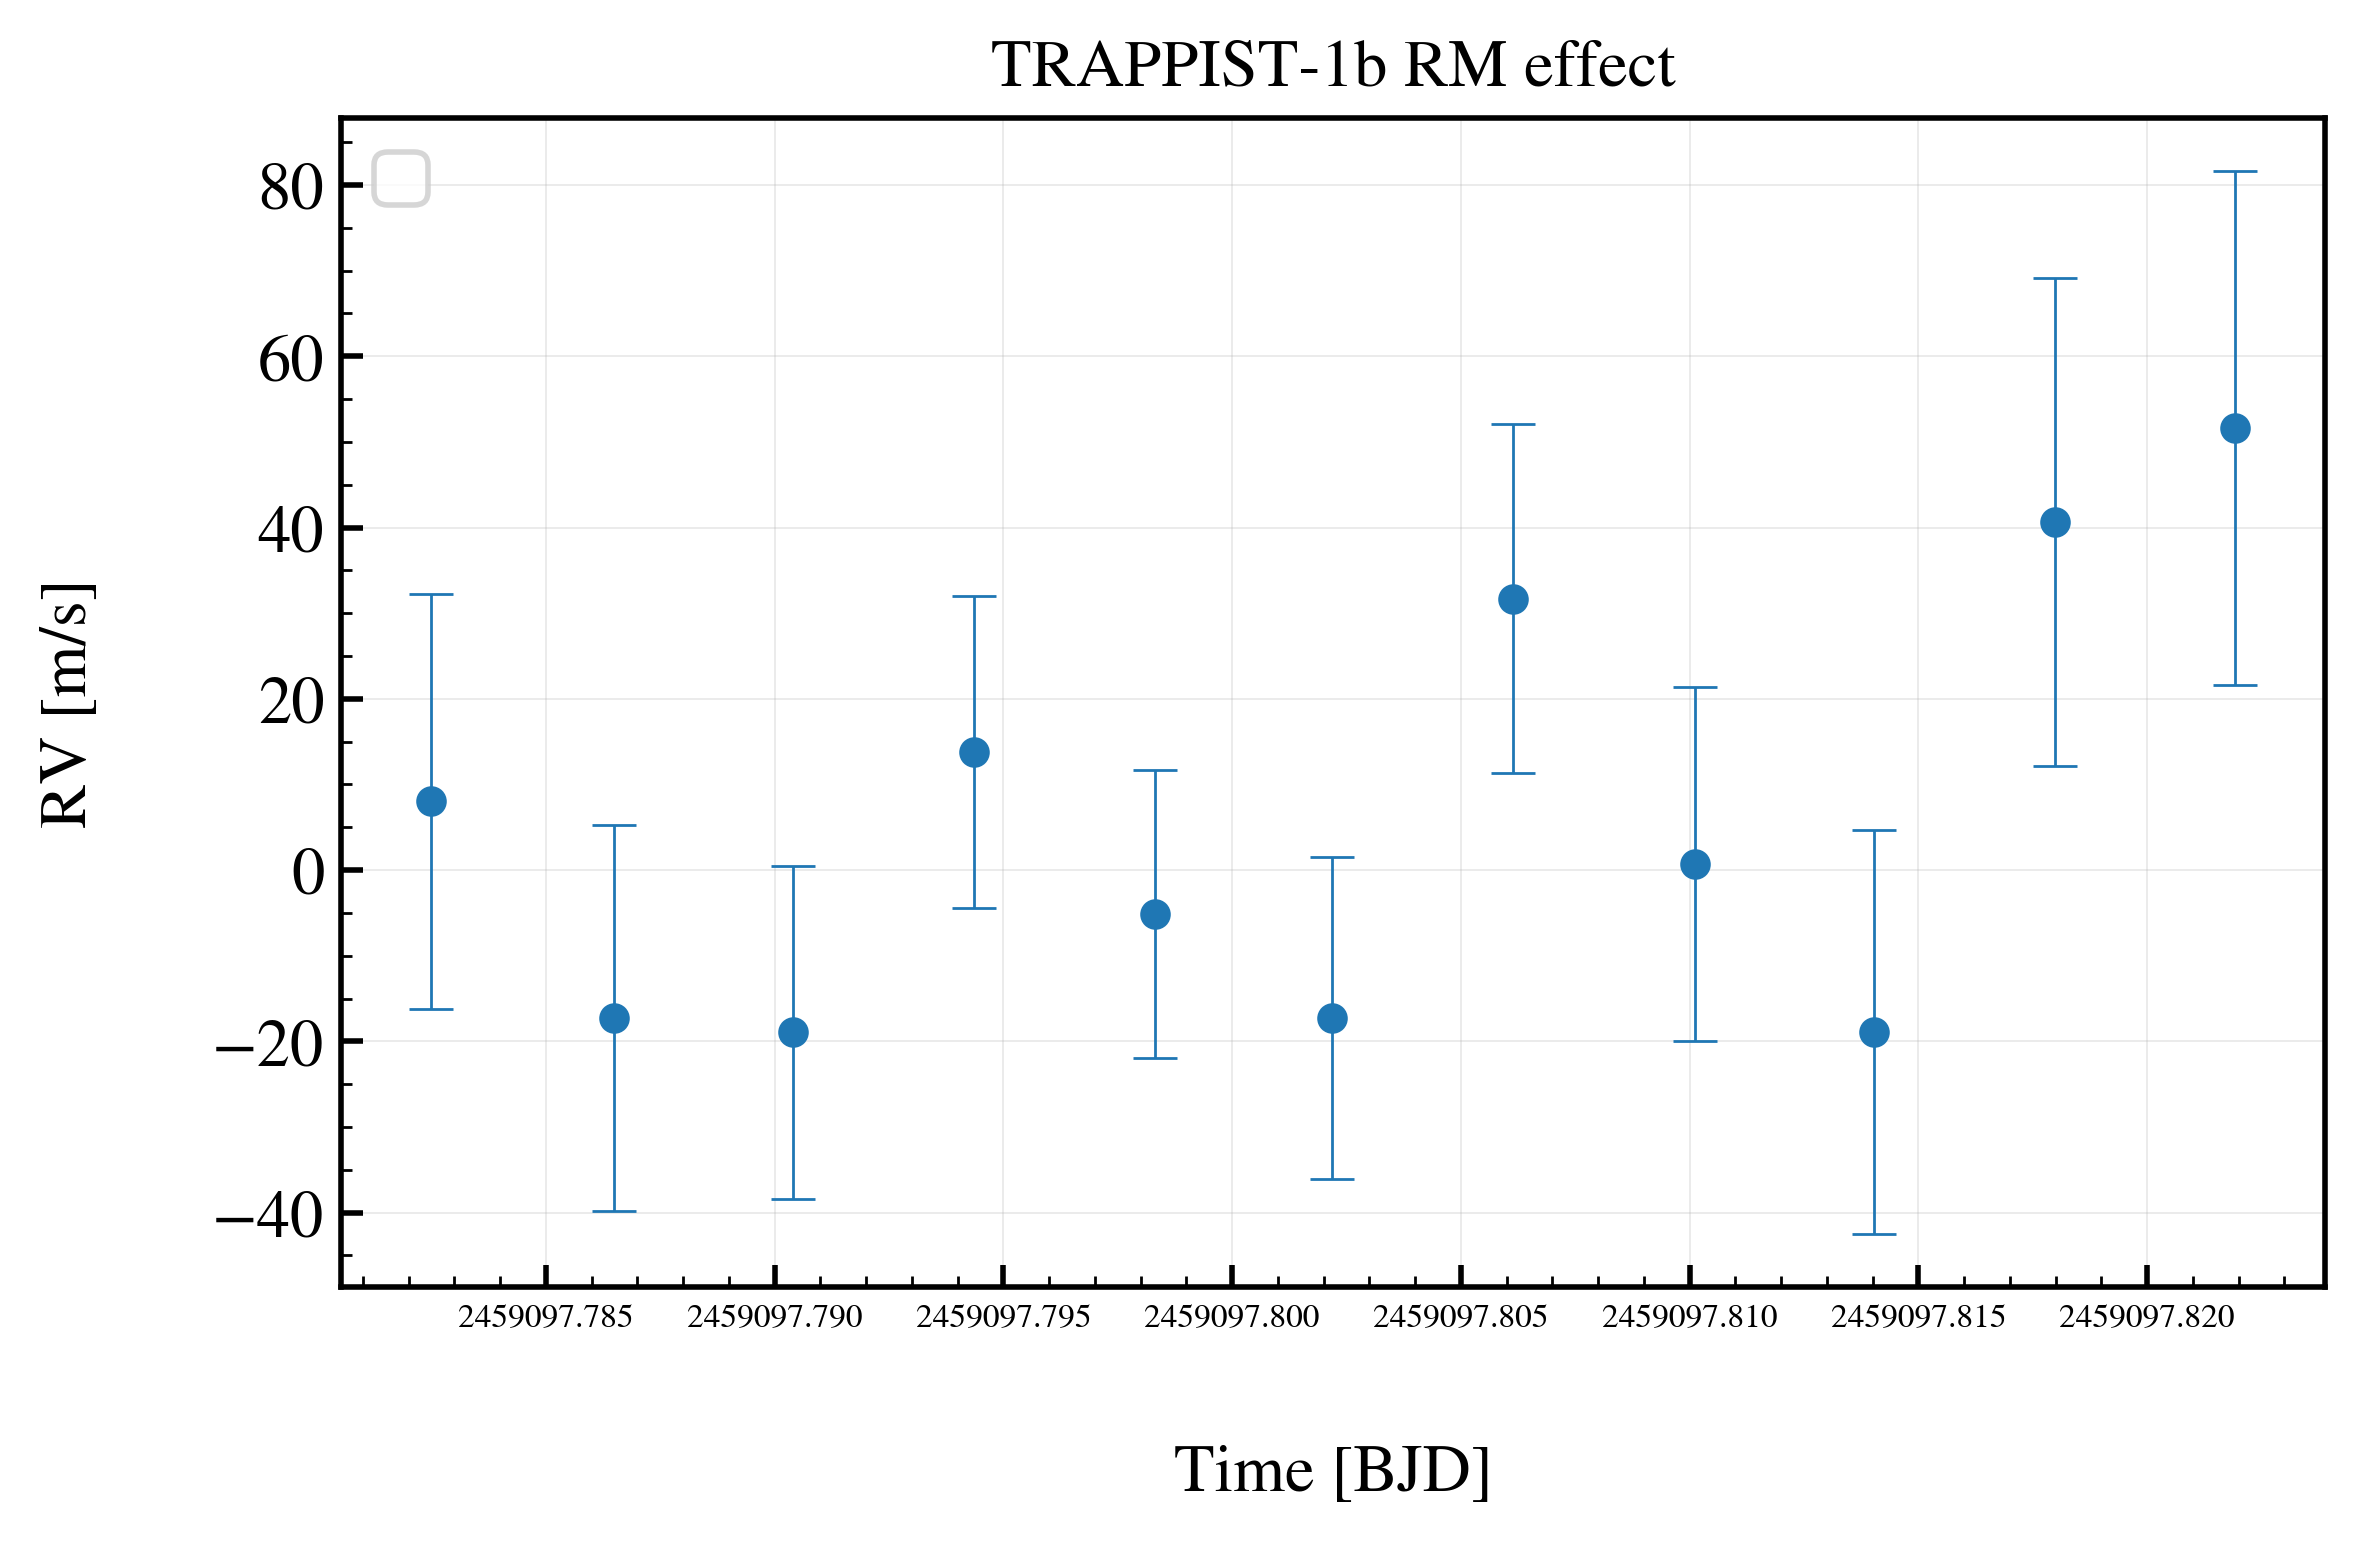

In [80]:
fig, ax = plt.subplots(dpi=200)
#ax.plot(x,rm_hirano,color='crimson')
ax.errorbar(df.bjd,df.rv,df.e_rv,marker='o',lw=0,mew=0.5,elinewidth=0.5,capsize=4)

ax.legend(loc="upper left",fontsize=12)
astropylib.gkastro.ax_apply_settings(ax)
ax.set_xlabel('Time [BJD]',fontsize=12)
ax.set_ylabel('RV [m/s]',fontsize=12)
ax.set_title('TRAPPIST-1b RM effect',fontsize=12)

fig.tight_layout()
astropylib.gkastro.ax_set_linewidth(ax,1)
ax.tick_params('x',labelsize=6)
print(np.median(df.e_rv))

In [81]:
f = '../data/20200909_trappist1.dat'
L = rm.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rm.RMFit(L)

   prior          arg1          arg2     label description priortype  fixed
0     NP  2.457323e+06  9.277040e-05     t0_p1       t0_p1     model  False
1     NP  1.510880e+00  6.683000e-07      P_p1        P_p1     model  False
2     UP -1.800000e+02  1.800000e+02    lam_p1      lam_p1     model  False
3     NP  2.000000e+00  5.000000e-01     vsini       vsini     model  False
4     NP  8.900000e+01  2.000000e-01    inc_p1      inc_p1     model  False
5     NP  8.360000e-02  2.000000e-03      p_p1        p_p1     model  False
6     NP  2.000000e+01  5.000000e-01      a_p1        a_p1     model  False
7     NP  8.900000e-02  1.000000e-03     rstar       rstar     model  False
8     NP  5.000000e-01  5.000000e-02        u1          u1     model  False
9     UP -5.000000e+01  5.000000e+01     gamma       gamma     model  False
10    FP  0.000000e+00  0.000000e+00    ecc_p1      ecc_p1     model   True
11    FP  9.000000e+01  9.000000e+01  omega_p1    omega_p1     model   True
12    NP  3.

In [82]:
TF.minimize_PyDE(mcmc=False)

Running PyDE Optimizer
Optimized using PyDE
Final parameters:
    labels       centers         lower         upper            pv   center_dist
0    t0_p1  2.457323e+06  2.457323e+06  2.457323e+06  2.457323e+06  1.362991e-06
1     P_p1  1.510880e+00  1.510876e+00  1.510883e+00  1.510879e+00  8.750216e-08
2   lam_p1  0.000000e+00 -1.800000e+02  1.800000e+02  1.352501e+02 -1.352501e+02
3    vsini  2.000000e+00 -5.000000e-01  4.500000e+00  1.994852e+00  5.147860e-03
4   inc_p1  8.900000e+01  8.800000e+01  9.000000e+01  8.900460e+01 -4.599126e-03
5     p_p1  8.360000e-02  7.360000e-02  9.360000e-02  8.359796e-02  2.037450e-06
6     a_p1  2.000000e+01  1.750000e+01  2.250000e+01  1.999045e+01  9.554605e-03
7    rstar  8.900000e-02  8.400000e-02  9.400000e-02  8.899982e-02  1.799245e-07
8       u1  5.000000e-01  2.500000e-01  7.500000e-01  4.998373e-01  1.626902e-04
9    gamma  0.000000e+00 -5.000000e+01  5.000000e+01  5.379872e+00 -5.379872e+00
10   vbeta  3.000000e+00  5.000000e-01  5.50000

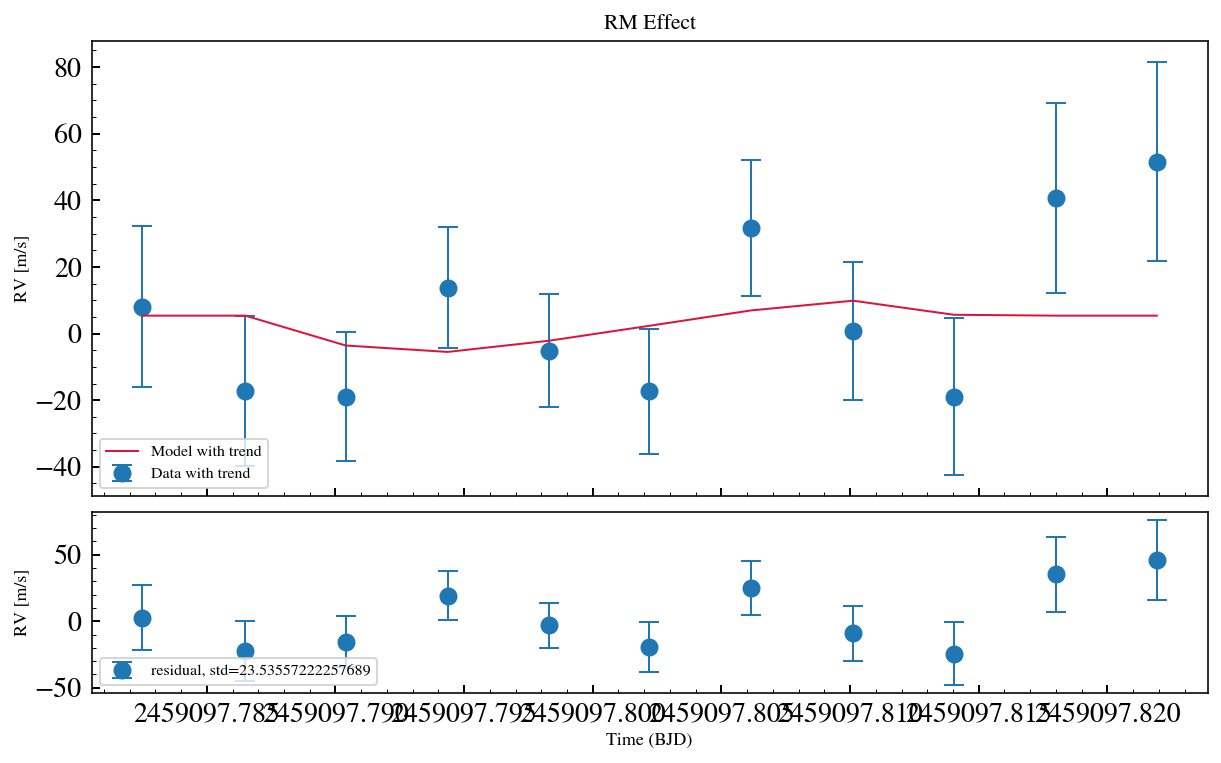

In [83]:
TF.plot_lc(TF.min_pv)

In [84]:
TF.minimize_PyDE(mcmc=True,mc_iter=1000)

Running PyDE Optimizer
Optimized using PyDE
Final parameters:
    labels       centers         lower         upper            pv   center_dist
0    t0_p1  2.457323e+06  2.457323e+06  2.457323e+06  2.457323e+06  1.505483e-06
1     P_p1  1.510880e+00  1.510876e+00  1.510883e+00  1.510879e+00  8.766994e-08
2   lam_p1  0.000000e+00 -1.800000e+02  1.800000e+02  1.352024e+02 -1.352024e+02
3    vsini  2.000000e+00 -5.000000e-01  4.500000e+00  1.995141e+00  4.858631e-03
4   inc_p1  8.900000e+01  8.800000e+01  9.000000e+01  8.900454e+01 -4.542095e-03
5     p_p1  8.360000e-02  7.360000e-02  9.360000e-02  8.359506e-02  4.935256e-06
6     a_p1  2.000000e+01  1.750000e+01  2.250000e+01  1.998930e+01  1.070030e-02
7    rstar  8.900000e-02  8.400000e-02  9.400000e-02  8.900038e-02 -3.844250e-07
8       u1  5.000000e-01  2.500000e-01  7.500000e-01  4.997785e-01  2.215195e-04
9    gamma  0.000000e+00 -5.000000e+01  5.000000e+01  5.390226e+00 -5.390226e+00
10   vbeta  3.000000e+00  5.000000e-01  5.50000

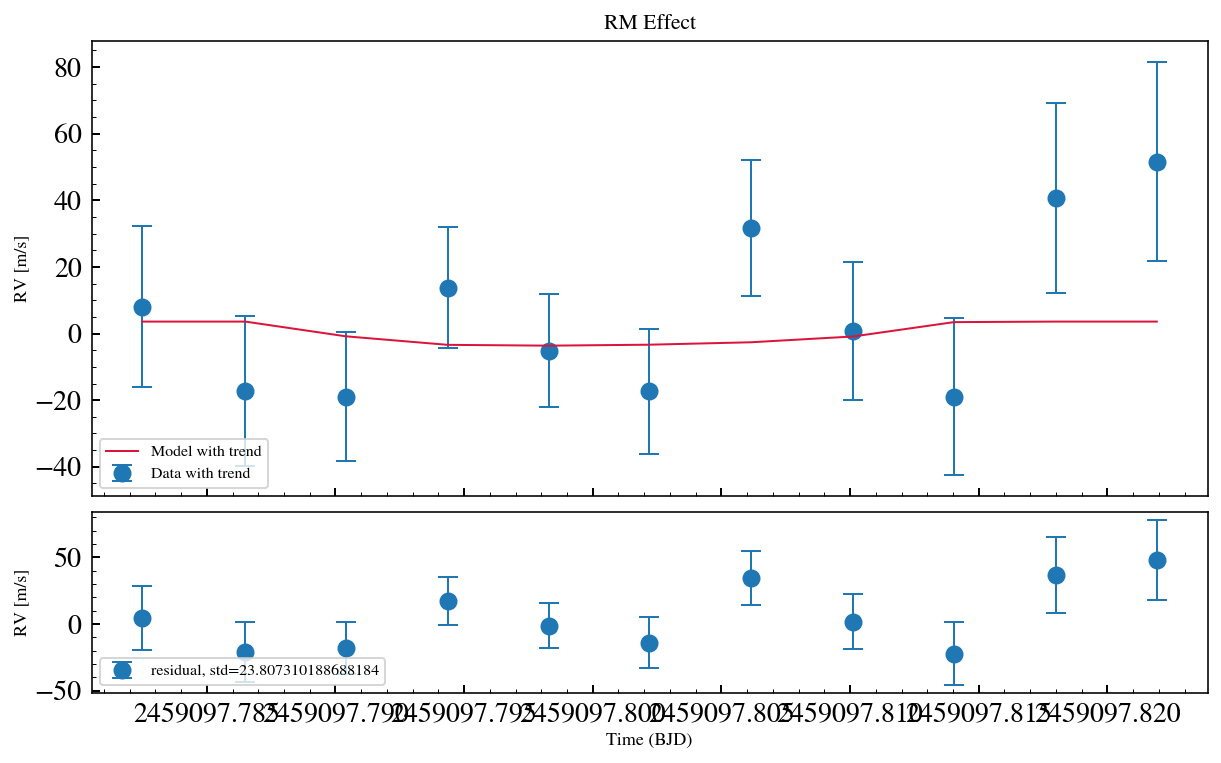

In [85]:
TF.plot_lc_mcmc_fit()

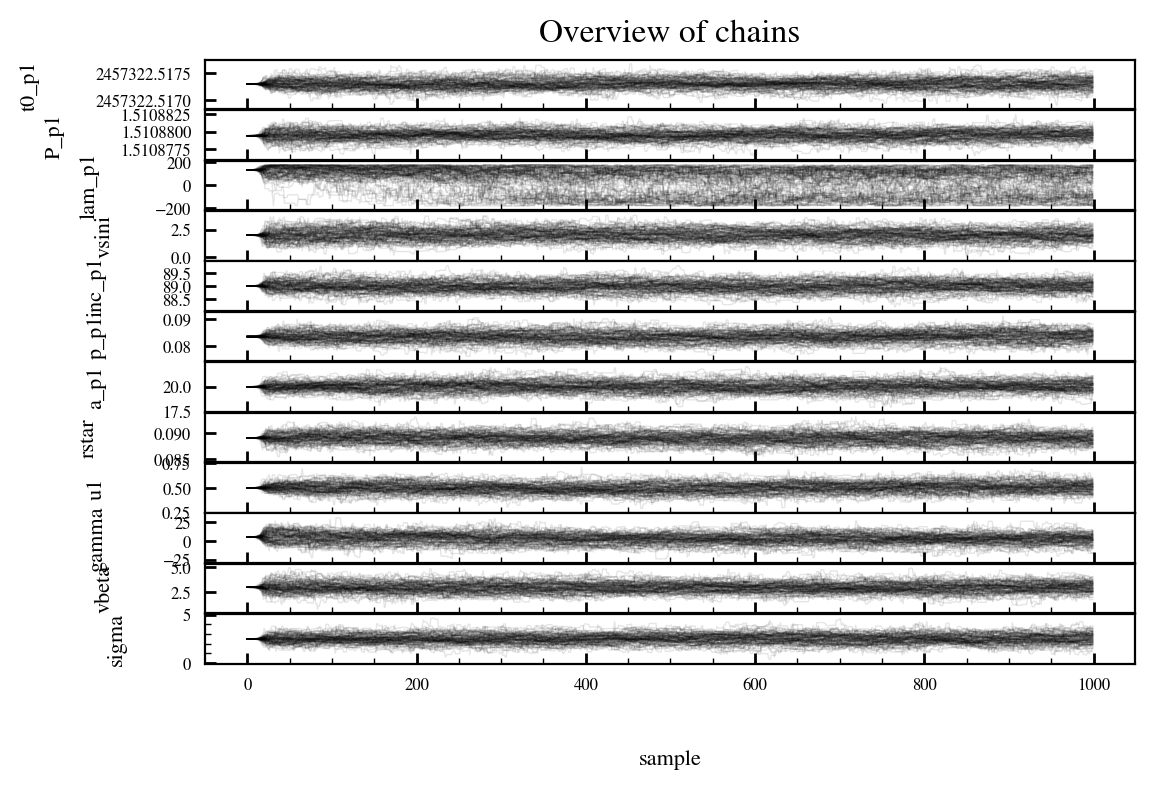

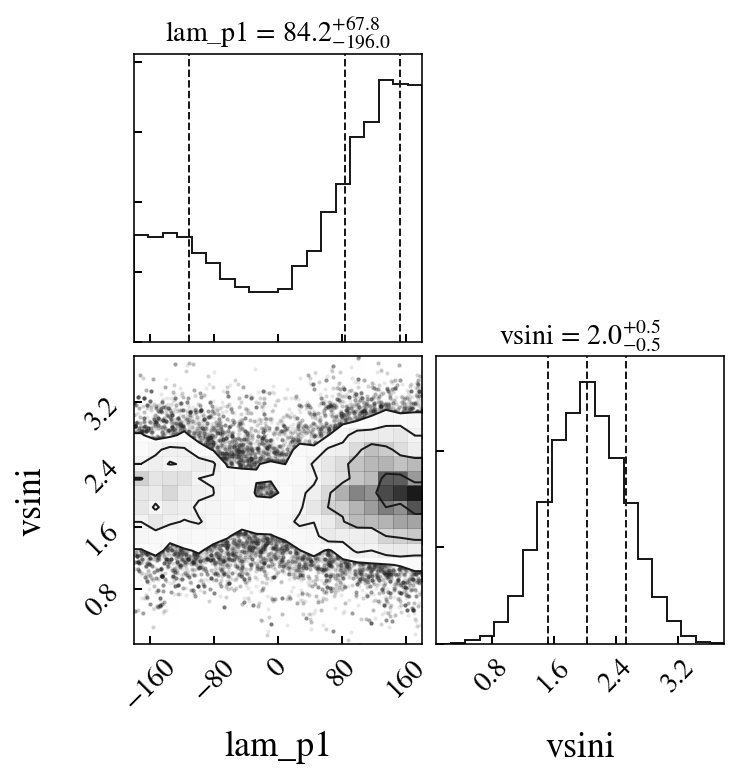

In [86]:
from astropylib import mcFunc
mcFunc.plot_chains(TF.sampler.chain,labels=TF.lpf.ps_vary.labels)
fig = astropylib.mcFunc.plot_corner(TF.sampler.chain[:,100:,[2,3]],
       show_titles=True,labels=np.array(TF.lpf.ps_vary.descriptions)[[2,3]],title_fmt='.1f',xlabcord=(0.5, -0.2))

Sampling, i= 0
Sampling, i= 100
Sampling, i= 200
Sampling, i= 300
Sampling, i= 400
Sampling, i= 500
Sampling, i= 600
Sampling, i= 700


Text(0.5, 0, 'Time from mid transit [hours]')

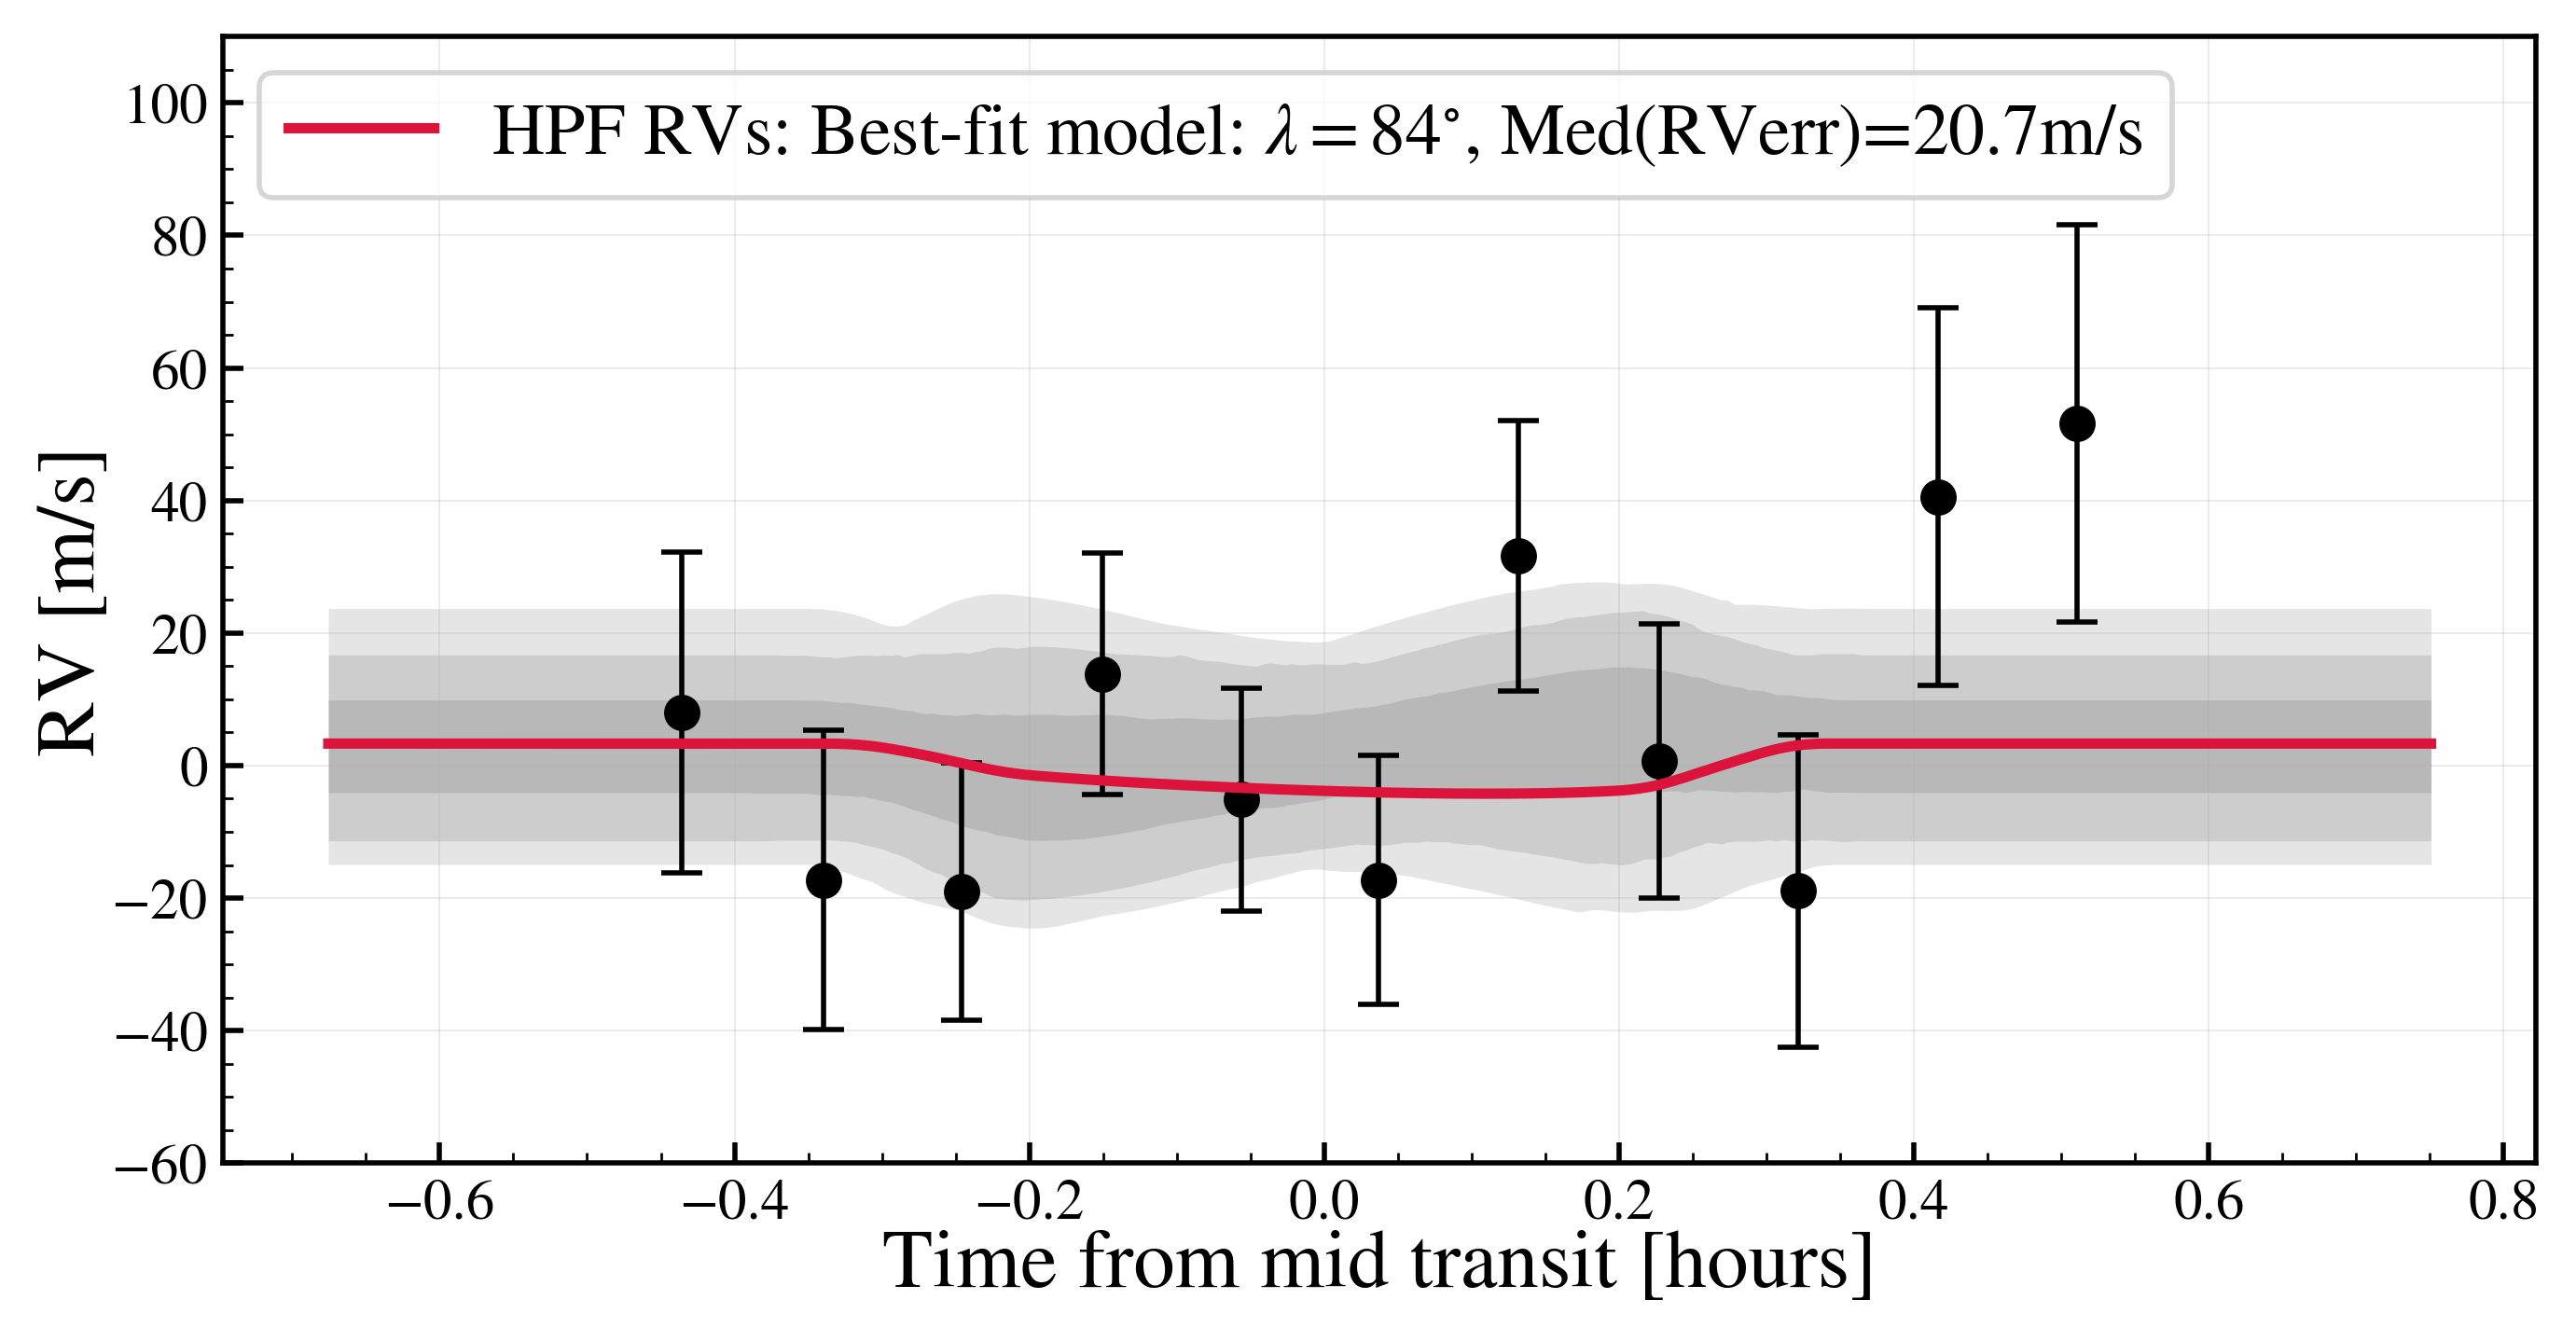

In [89]:
import astropylib.spec_help
#flatchain = TF.sampler.chain[:,2000::100,:].reshape((-1,len(TF.lpf.priors)))
flatchain = TF.sampler.chain[:,100:,:].reshape((-1,len(TF.lpf.ps_vary.priors)))

times = np.linspace(TF.lpf.data['time'][0],TF.lpf.data['time'][-1],500)

pv_50 = np.percentile(flatchain,[50],axis=0)[0]
t1_mod = np.linspace(times.min()-0.01,times.max()+0.01,300)

rv_50 = TF.lpf.compute_transit(pv_50,t1_mod)

# Plot random samples
fig, ax = plt.subplots(dpi=200,figsize=(8,4))#,gridspec_kw={'height_ratios': [2, 2]})


#################
# Transit 1
#################
markercolor="black"
ax.errorbar((TF.lpf.data['time']-T0)*24,TF.lpf.data['flux'],TF.lpf.data['error'],
            marker='o',elinewidth=1,capsize=4,lw=0,mew=1,color=markercolor,markersize=6)
lab = r'HPF RVs: Best-fit model: $\lambda=${:0.0f}'.format(pv_50[2])+'$^{\circ}$'
lab += ', Med(RVerr)={:0.1f}m/s'.format(np.median(TF.lpf.data['error']))
ax.plot((t1_mod-T0)*24.,rv_50,color="crimson",
        label=lab,lw=2.,zorder=10)
ax.legend(loc='upper left',fontsize=14)

#################
# Sample models
#################
mmodel1 = []
for i in range(800):
    if i%100 == 0: print("Sampling, i=",i)
    idx = np.random.randint(0, flatchain.shape[0])
    m1 = TF.lpf.compute_transit(flatchain[idx],times=t1_mod)
    mmodel1.append(m1)

mmodel1 = np.array(mmodel1)


shadecolor="black"
ax.fill_between((t1_mod-T0)*24.,np.quantile(mmodel1,0.16,axis=0),np.quantile(mmodel1,0.84,axis=0),alpha=0.1,color=shadecolor,lw=0,label='1$\sigma$',zorder=-1)
ax.fill_between((t1_mod-T0)*24.,np.quantile(mmodel1,0.02,axis=0),np.quantile(mmodel1,0.98,axis=0),alpha=0.1,color=shadecolor,lw=0,label='2$\sigma$',zorder=-1)
ax.fill_between((t1_mod-T0)*24.,np.quantile(mmodel1,0.0015,axis=0),np.quantile(mmodel1,0.9985,axis=0),alpha=0.1,color=shadecolor,lw=0,label='3$\sigma$',zorder=-1)


astropylib.gkastro.ax_apply_settings(ax,ticksize=11)
ax.set_ylim(-60,110)
astropylib.gkastro.ax_set_linewidth(ax,1)
    
ax.set_ylabel("RV [m/s]",fontsize=16,labelpad=0)   
ax.set_xlabel('Time from mid transit [hours]',fontsize=16,labelpad=0)

In [44]:
f = '/Users/gks/Dropbox/mypylib/notebooks/FLASK/01_microblog/app/static/DATA/HPF_RVS2/uploading/data/targets/TRAPPIST-1/results_20200909_o45614151617/TRAPPIST-1_rv_unbin.csv'
df = pd.read_csv(f)
df = df[df.e_rv < 35.]

In [45]:
# hirano
t0_c12apo = 2457322.5172943915
t0_c12apo_err = 0.0000927704#0.002
P_c12apo = 1.5108795116#1.51089#1.51087
P_c12apo_err = 0.0000006683#0.0002
T0 = 2459097.80064
tdur = 1./24.

In [46]:
df_phases = astropylib.gkastro.get_phases_sorted(df.bjd.values,P_c12apo,t0_c12apo,
                                                 rvs=df.rv.values,rvs_err=df.e_rv.values,
                                                 tdur=1./24.,)
df_phases

Found 19 in transit


,phases,time,rvs,rvs_err,intransit
0,-0.405669,2.458404e+06,26.804789,32.877501,False
1,-0.402829,2.458404e+06,14.742394,11.763343,False
2,-0.399312,2.458404e+06,11.525094,11.524456,False
3,-0.395782,2.458404e+06,-7.371866,15.835527,False
4,-0.392680,2.458404e+06,40.760195,30.929352,False
5,-0.349663,2.458395e+06,-3.927393,8.893378,False
6,-0.340555,2.458395e+06,-13.142719,6.299953,False
7,-0.326557,2.458744e+06,-26.696959,23.360599,False
8,-0.323955,2.458744e+06,25.182605,28.026682,False
9,-0.321376,2.458744e+06,-23.301658,21.839949,False


In [54]:
TF.lpf.ps_all.df

,prior,arg1,arg2,label,description,priortype,fixed
0,NP,2.457323e+06,9.277040e-05,t0_p1,t0_p1,model,False
1,NP,1.510880e+00,6.683000e-07,P_p1,P_p1,model,False
2,UP,-1.800000e+02,1.800000e+02,lam_p1,lam_p1,model,False
3,NP,2.000000e+00,5.000000e-01,vsini,vsini,model,False
4,NP,8.900000e+01,2.000000e-01,inc_p1,inc_p1,model,False
5,NP,8.360000e-02,2.000000e-03,p_p1,p_p1,model,False
6,NP,2.000000e+01,5.000000e-01,a_p1,a_p1,model,False
7,NP,8.900000e-02,1.000000e-03,rstar,rstar,model,False
8,NP,5.000000e-01,5.000000e-02,u1,u1,model,False
9,UP,-5.000000e+01,5.000000e+01,gamma,gamma,model,False


In [ ]:
df.bjd.values[0]

In [85]:
xx = np.linspace(df.bjd.values[0],df.bjd.values[-1],10000)
yy = TF.lpf.compute_transit(TF.lpf.ps_vary.centers,times=xx)

df_phases_m = astropylib.gkastro.get_phases_sorted(xx,P_c12apo,t0_c12apo,
                                                 rvs=yy,
                                                 tdur=1./24.,)
df_phases_m

Found 277 in transit


,phases,time,rvs,intransit
0,-0.499914,2.458444e+06,0.0,False
1,-0.499887,2.458736e+06,0.0,False
2,-0.499860,2.459028e+06,0.0,False
3,-0.499655,2.458633e+06,0.0,False
4,-0.499628,2.458925e+06,0.0,False
...,...,...,...,...
9995,0.499418,2.459044e+06,0.0,False
9996,0.499622,2.458650e+06,0.0,False
9997,0.499649,2.458941e+06,0.0,False
9998,0.499854,2.458547e+06,0.0,False


No handles with labels found to put in legend.


20.36648125777848


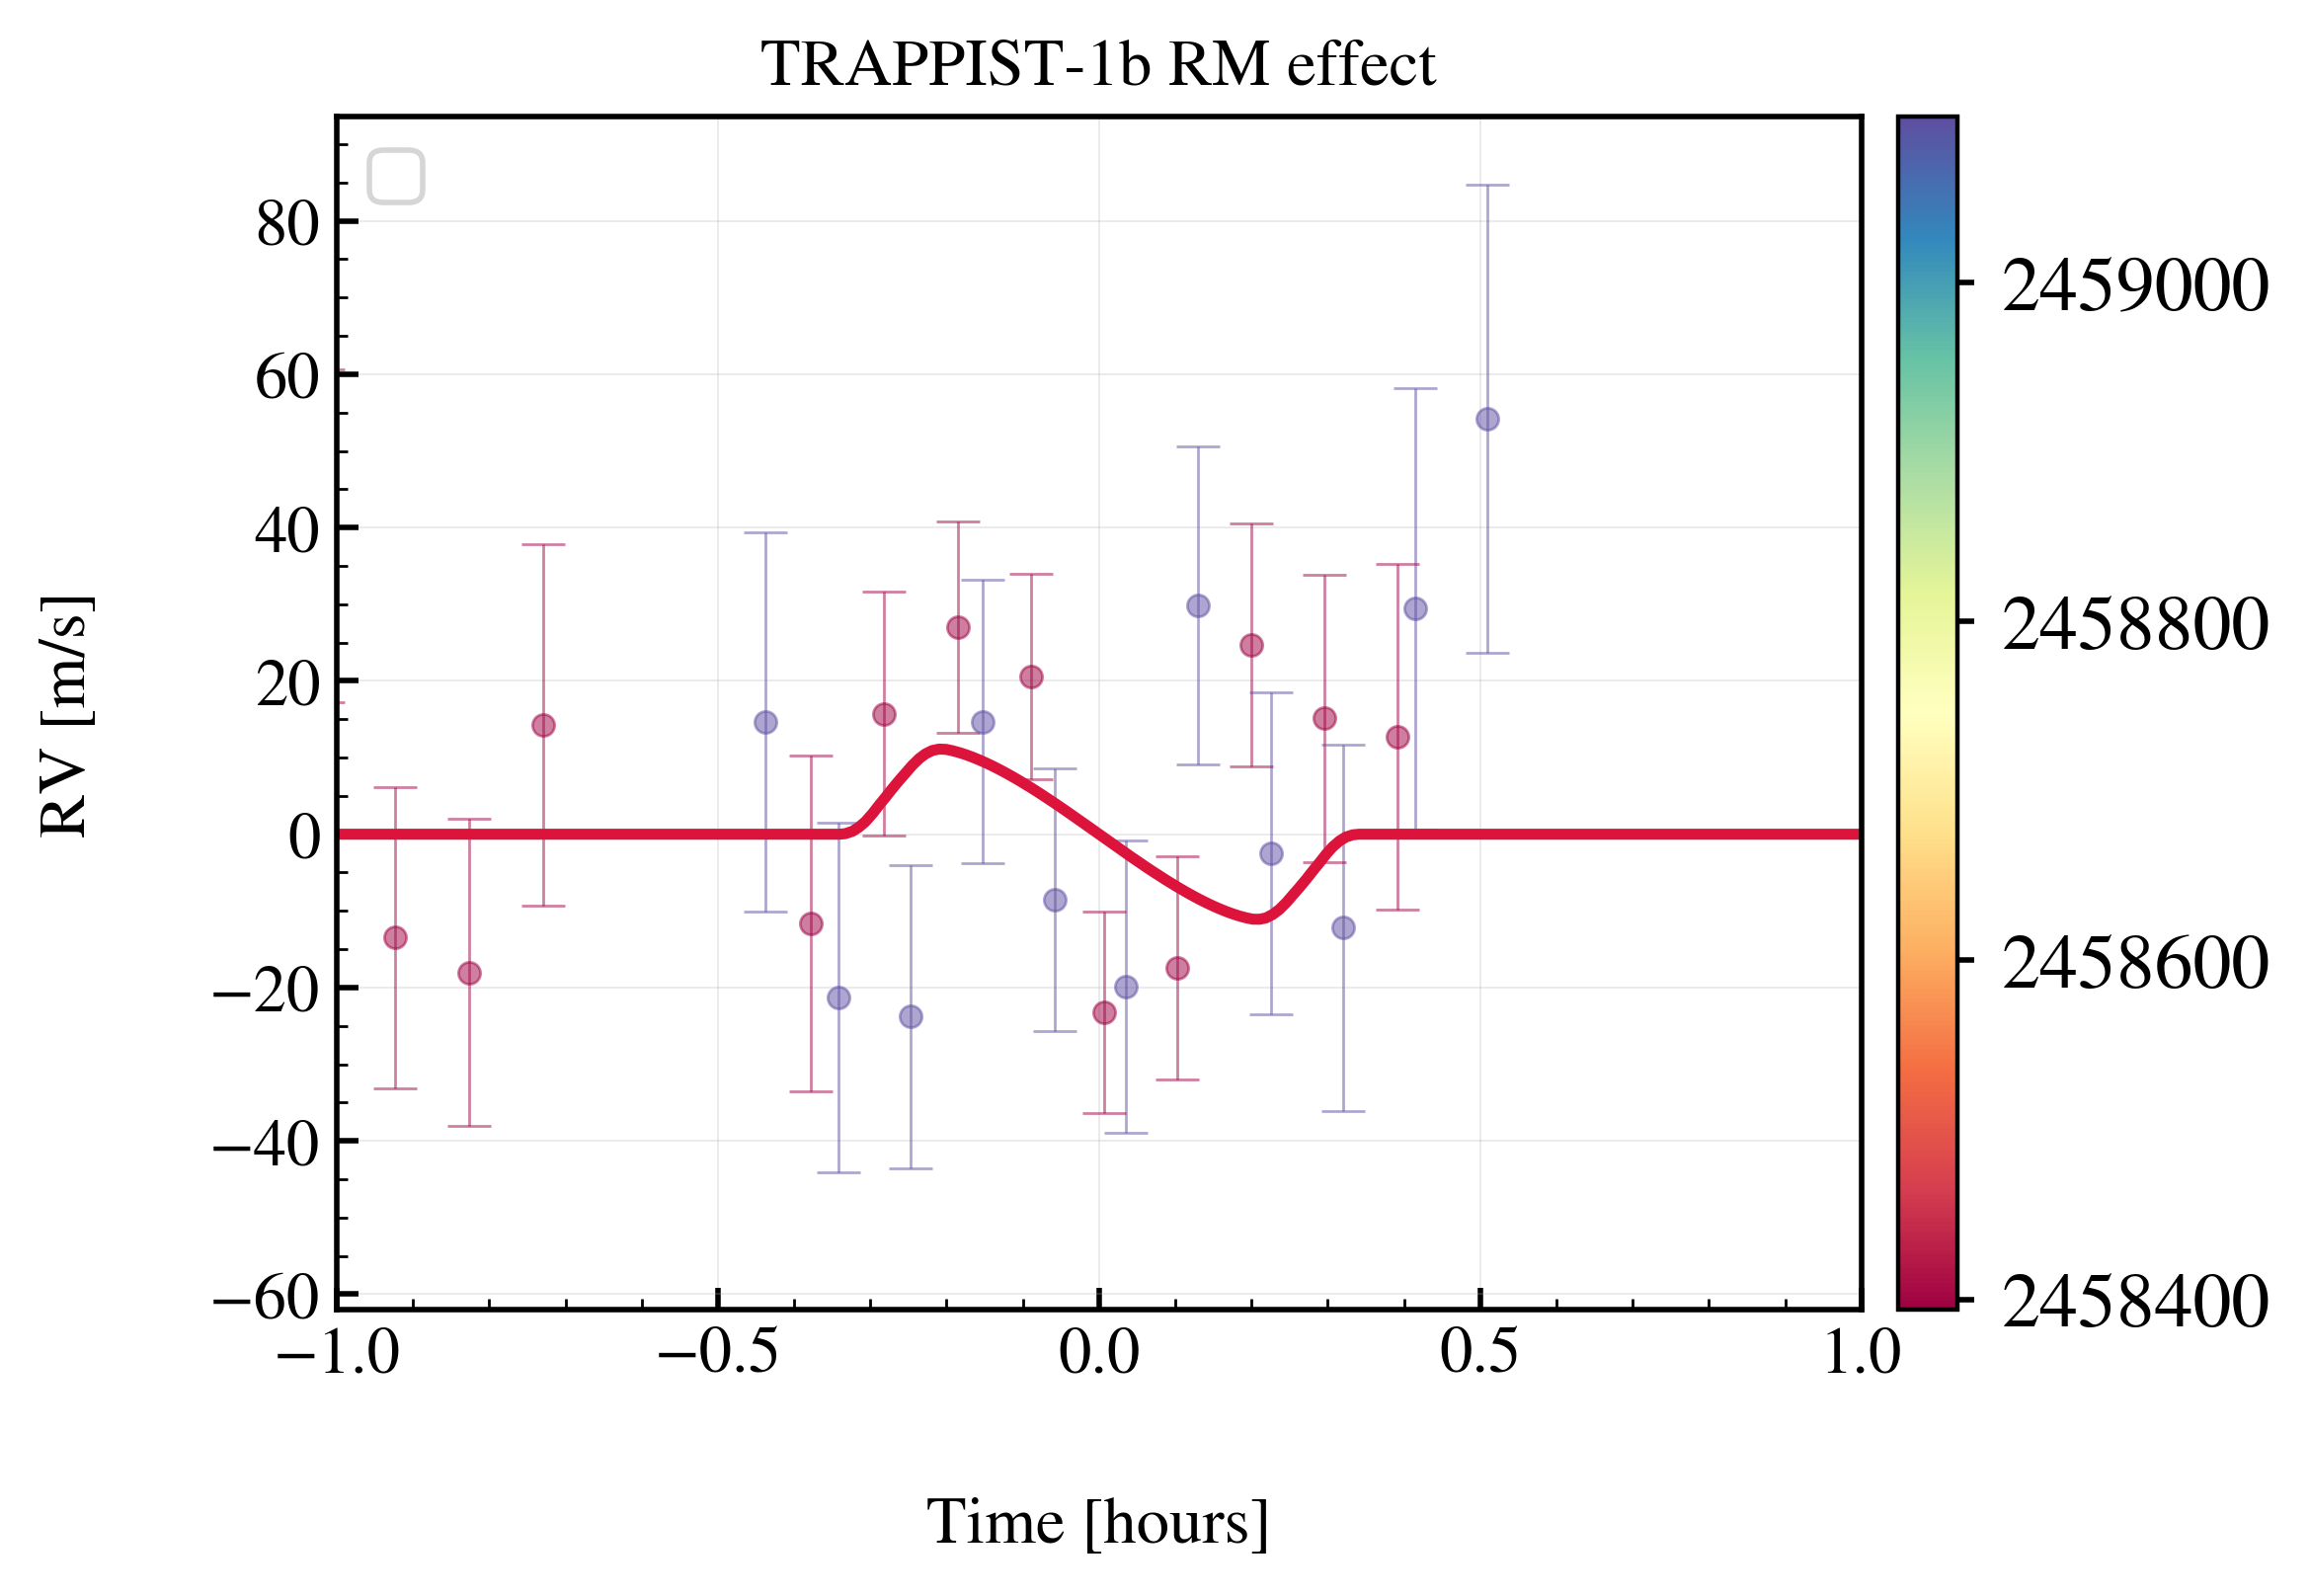

In [86]:
import astropylib.rm_models
TARGET = 'TRAPPIST-1b'

colors = astropylib.gkastro.get_cmap_colors(cmap='Spectral',p=df_phases.time.values)

# Model
fig, ax = plt.subplots(dpi=200)

for i in range(len(colors)):
    ax.errorbar(df_phases.phases.values[i]*P_c12apo*24.,
            df_phases.rvs.values[i],df_phases.rvs_err.values[i],marker='o',
            lw=0,mew=0.5,elinewidth=0.5,capsize=4,color=colors[i],markersize=4,alpha=0.5)
    
ax.plot(df_phases_m.phases*P_c12apo*24.,df_phases_m.rvs.values,color='crimson',lw=2)

ax.legend(loc="upper left",fontsize=12)
astropylib.gkastro.ax_apply_settings(ax)
ax.set_xlabel('Time [hours]',fontsize=12)
ax.set_ylabel('RV [m/s]',fontsize=12)
ax.set_title('TRAPPIST-1b RM effect',fontsize=12)
ax.set_xlim(-1,1.)
astropylib.gkastro.ax_add_colorbar(ax,p=df_phases.time.values,cmap='Spectral')

astropylib.gkastro.ax_set_linewidth(ax,1)
#ax.tick_params('x',labelsize=6)
print(np.median(df.e_rv))

In [89]:
np.median(df_phases.rvs_err.values[df_phases.intransit])

19.089549790063693

9.899494936611665

In [127]:
astropylib.exoplanet_functions.rm_sigma_lambda(0.,0.1,7,10.,19./np.sqrt(3))

41.35324705942945